In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn import metrics

In [299]:
df=pd.read_csv("../data/Crop_recommendation.csv")

In [300]:
df.head(30)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [170]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [172]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [173]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes!='O']
numerical_feature

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

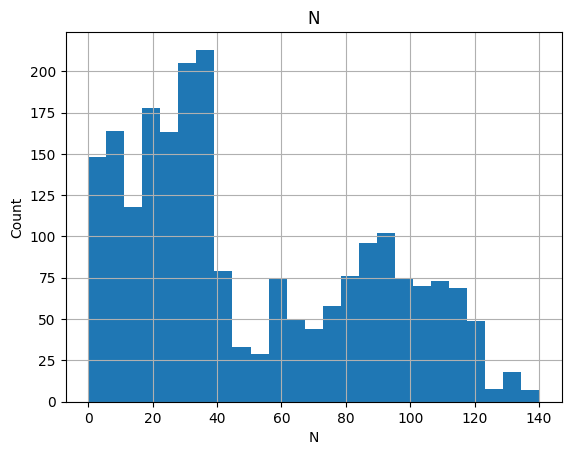

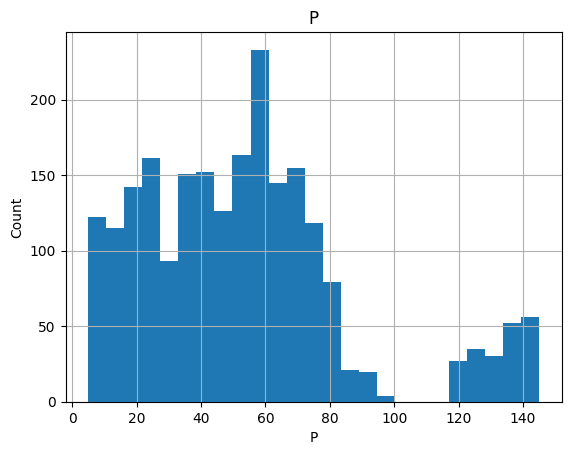

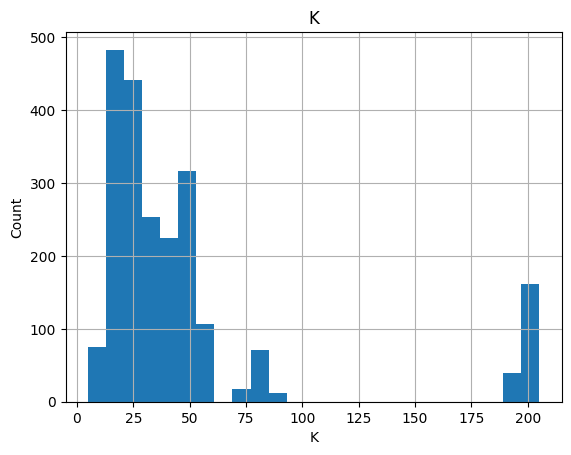

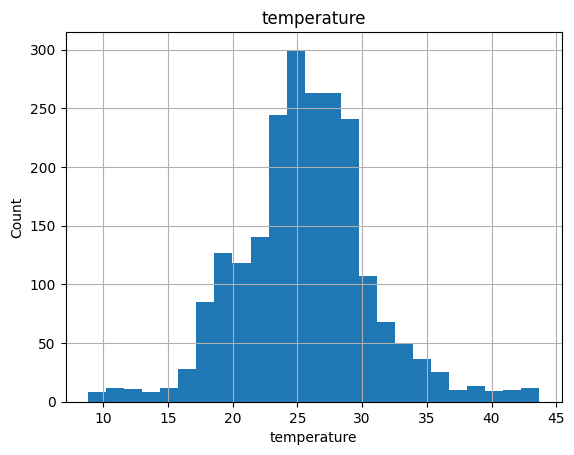

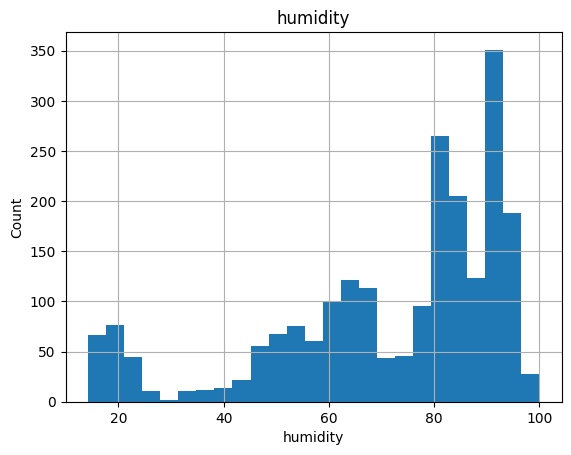

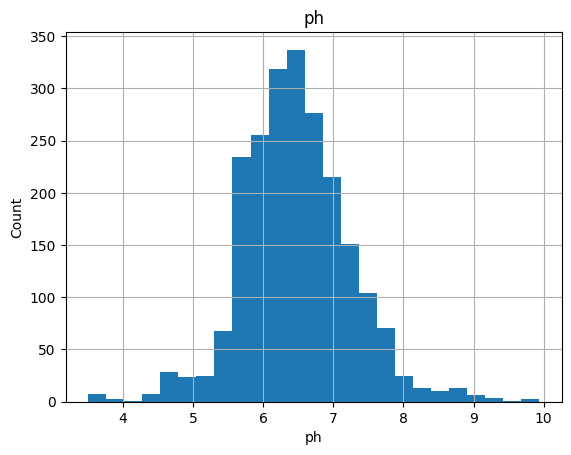

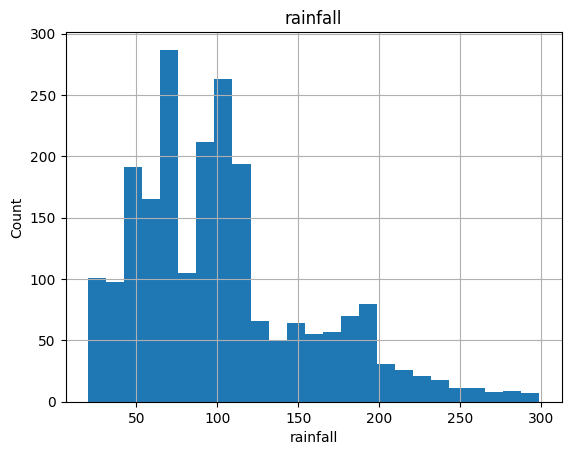

In [174]:
for feature in numerical_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [175]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
print(len(discrete_feature))

0


In [176]:
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature]
df[continuous_feature].head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


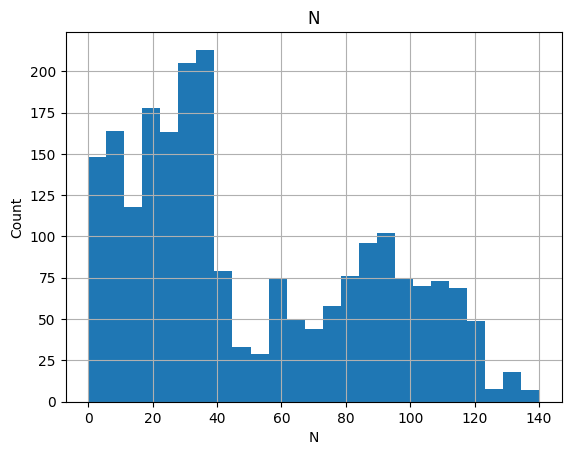

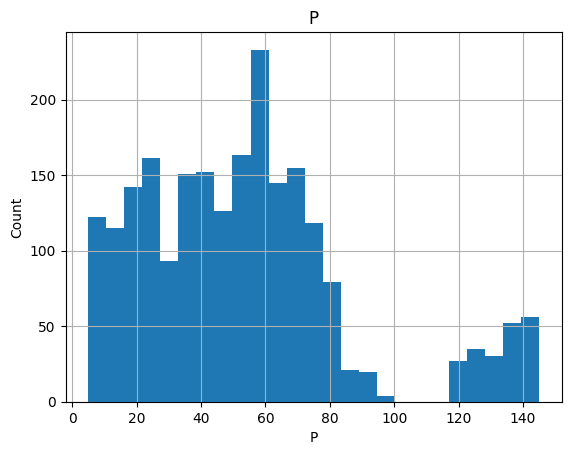

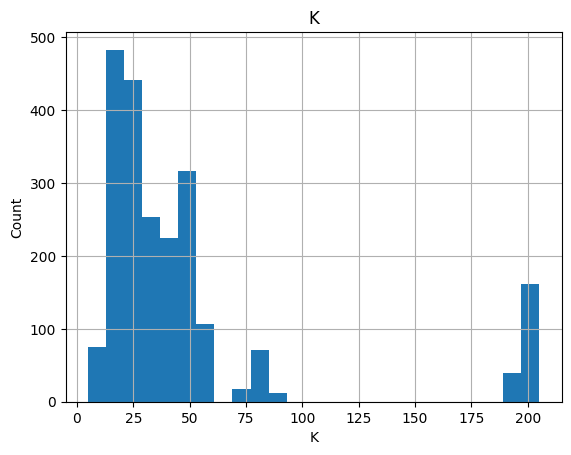

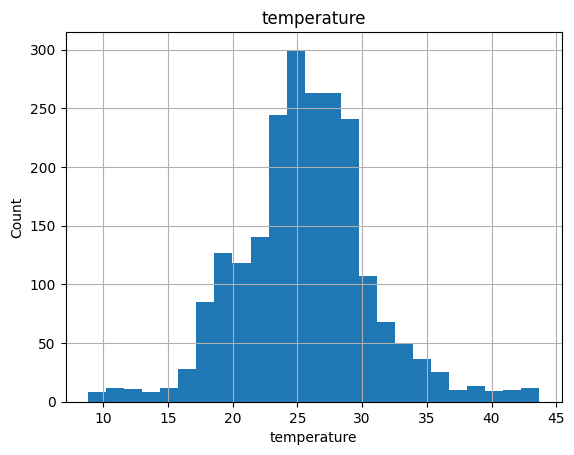

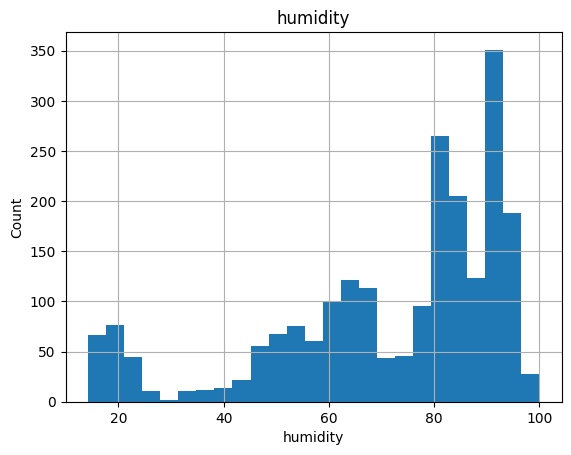

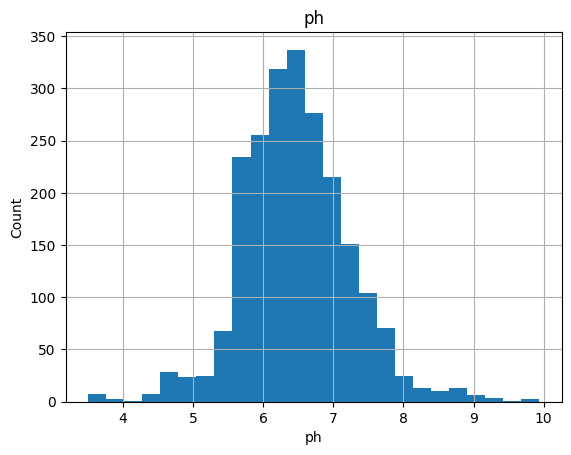

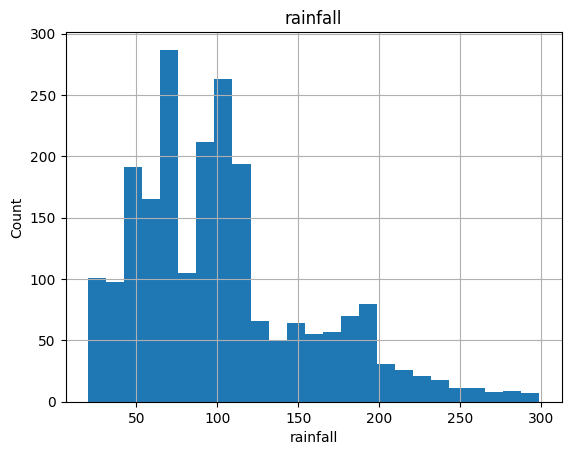

In [177]:

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

outliers

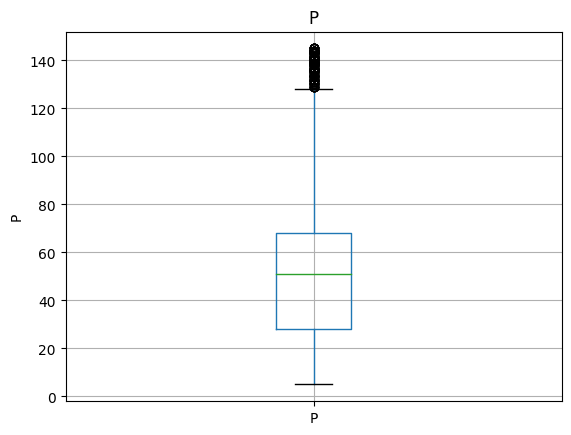

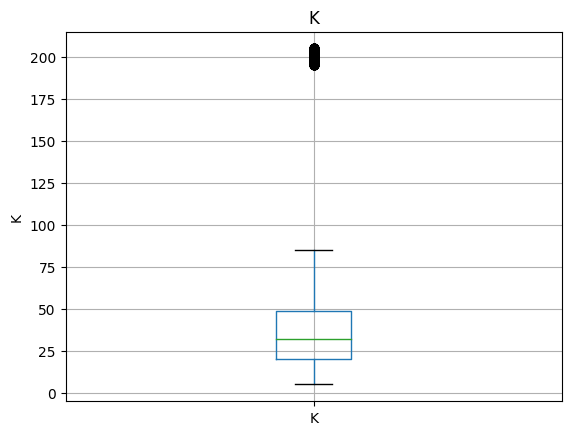

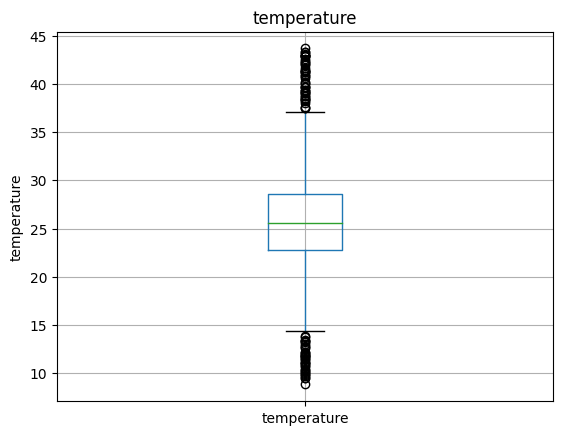

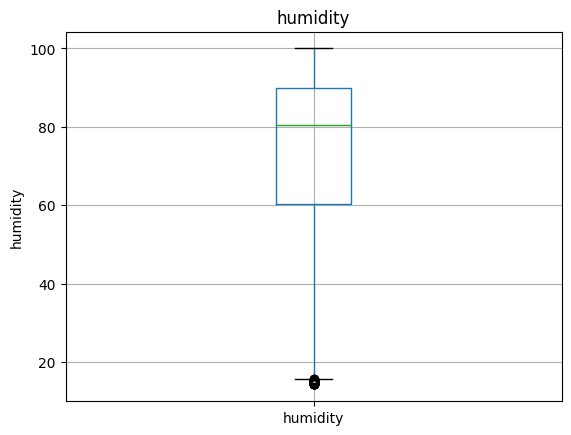

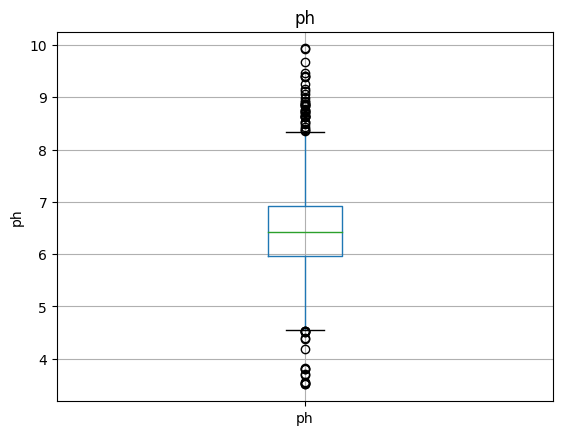

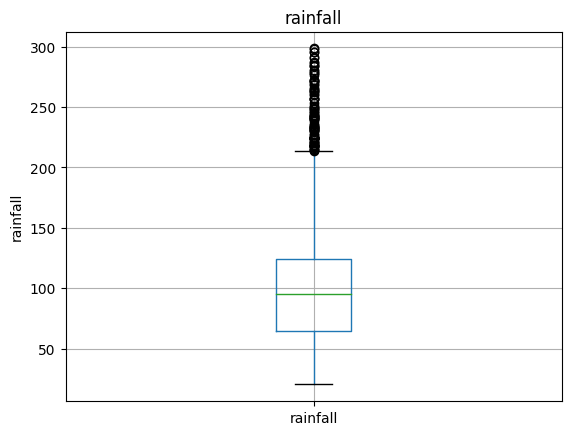

In [178]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        #data[feature]=np.log(data[feature])
        #df[feature],parameters=stat.boxcox(df[feature]+1)
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

outliers must be handled

Text(0, 0.5, 'count')

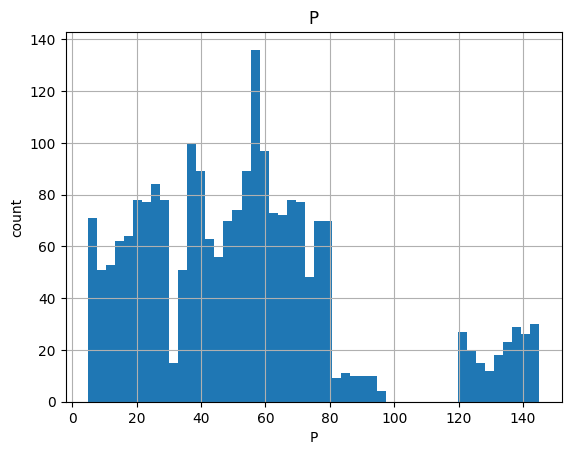

In [179]:
figure=df.P.hist(bins=50)
figure.set_title('P')
figure.set_xlabel('P')
figure.set_ylabel('count')

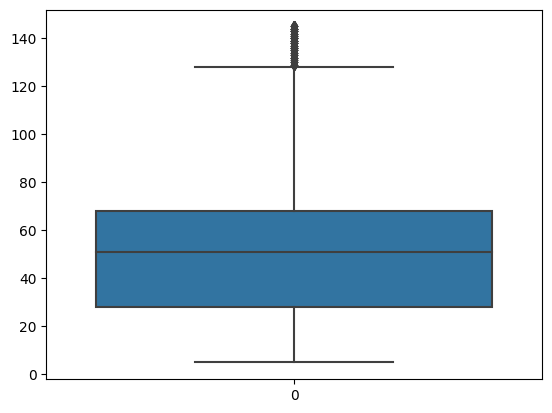

In [180]:
figure=sns.boxplot(df['P'])

handling outlier for "P","K","temp","hum","ph","rainfall" features

In [181]:
def IQR(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bridge = Q1 - 1.5 * IQR
    upper_bridge = Q3 + 1.5 * IQR
    df.loc[df[feature]<=lower_bridge, feature] = lower_bridge
    df.loc[df[feature]>=upper_bridge, feature] = upper_bridge


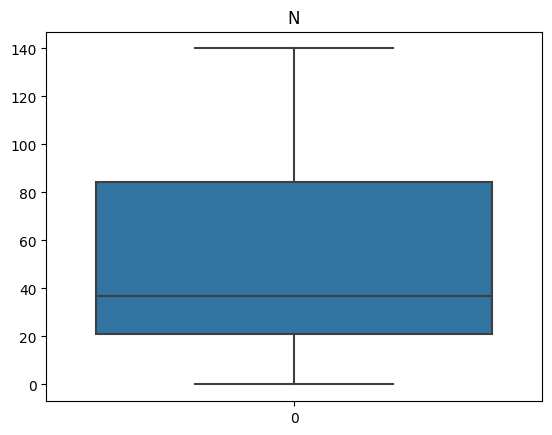

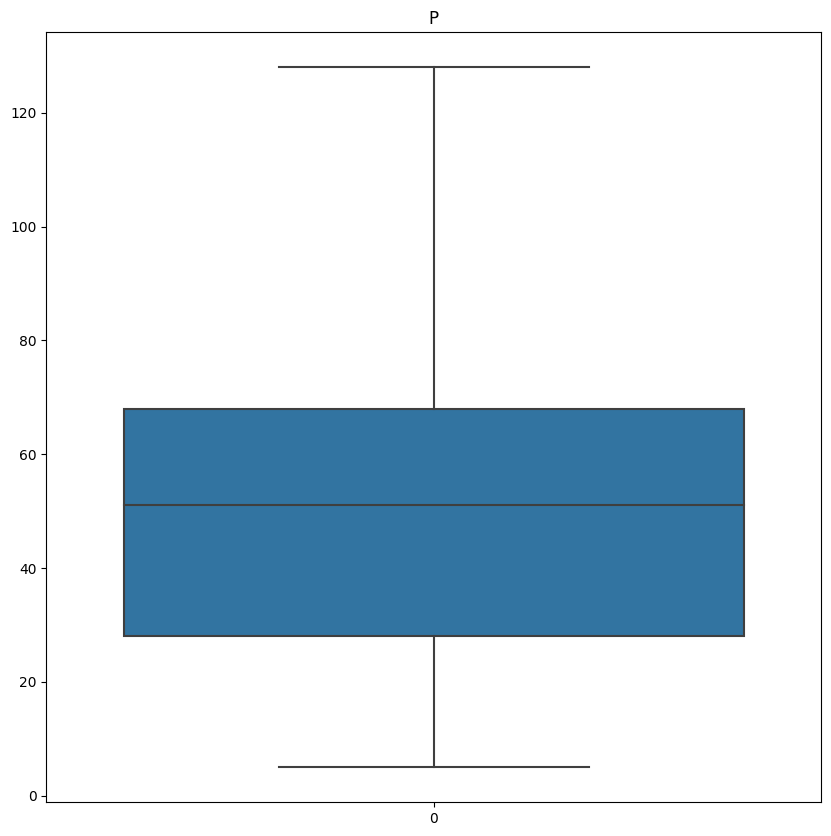

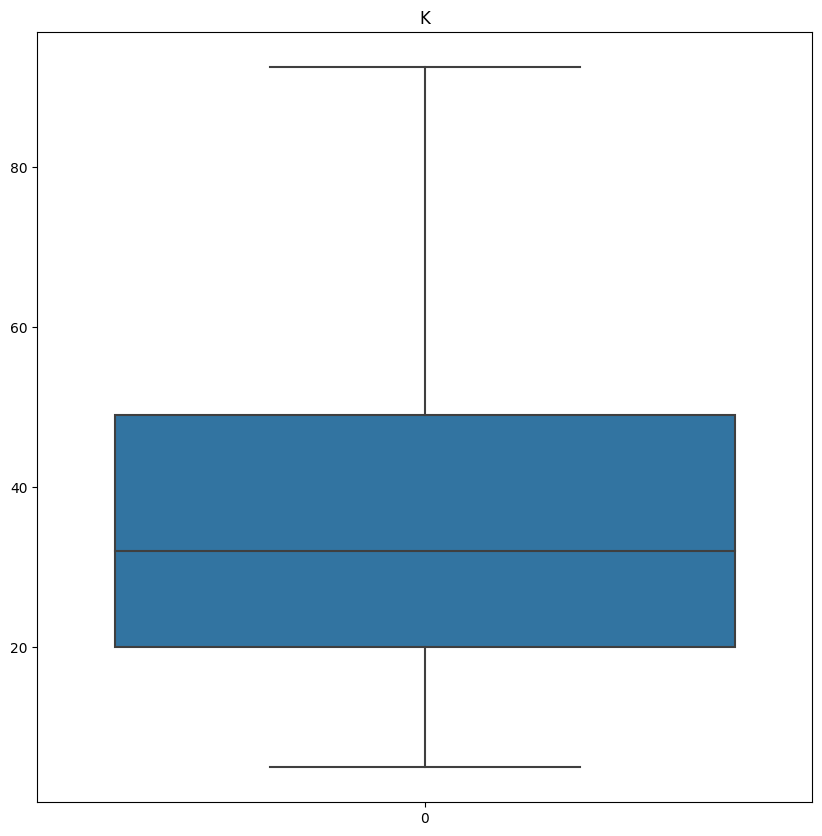

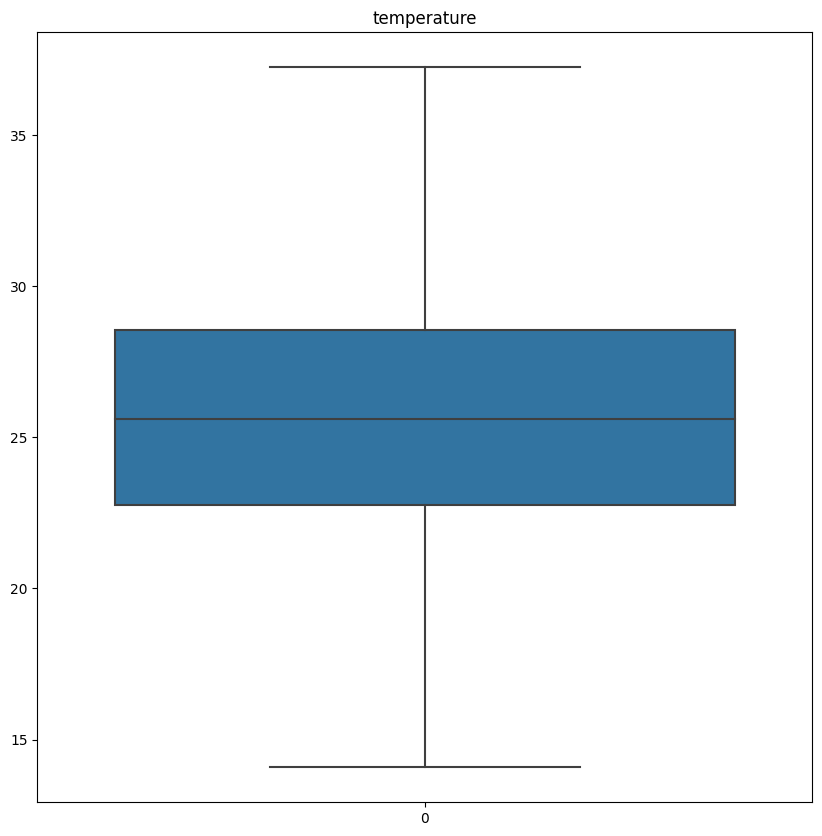

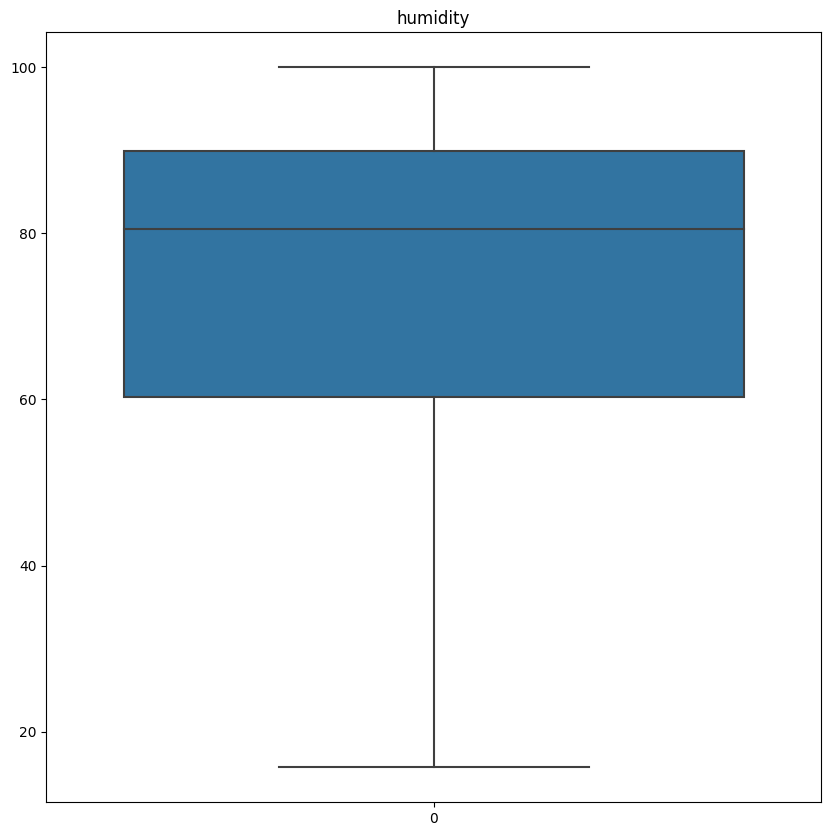

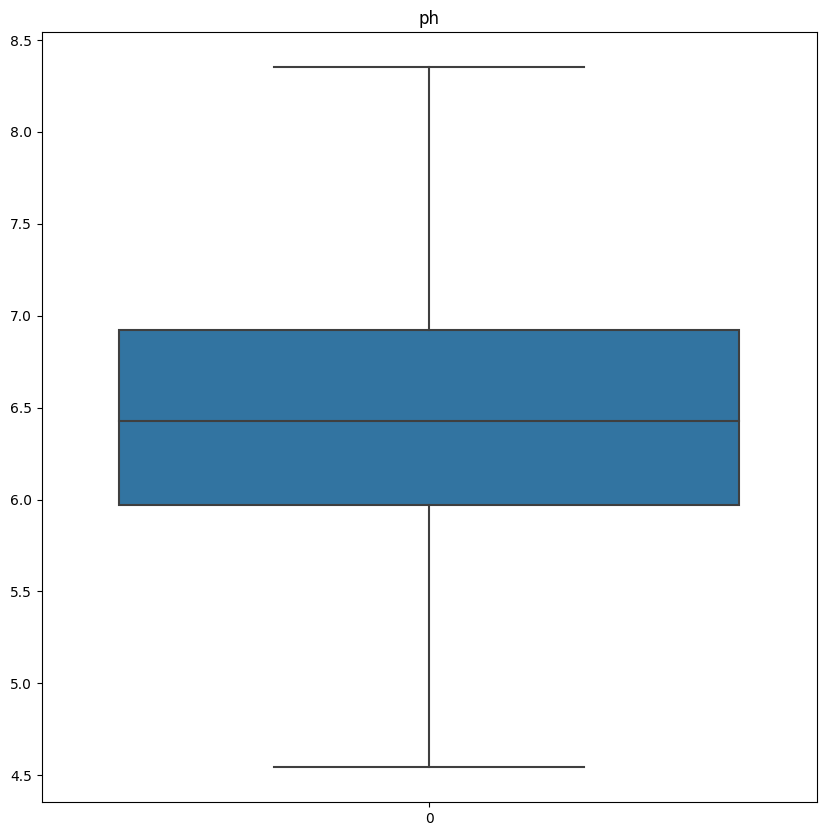

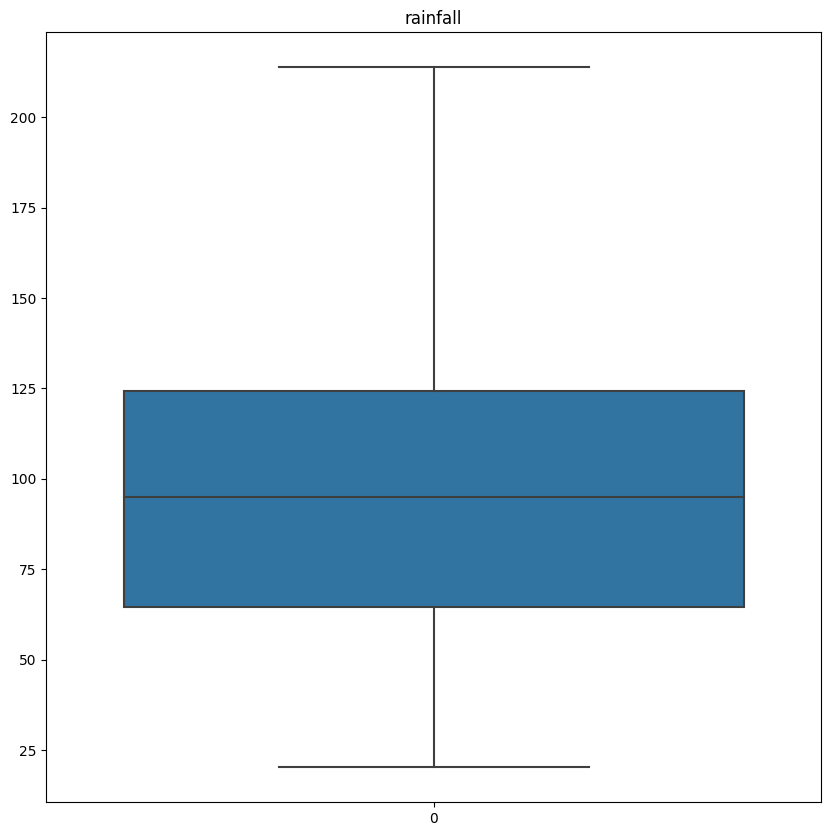

<Figure size 1000x1000 with 0 Axes>

In [182]:
 
for feature in continuous_feature:
    IQR(df, feature)
    data=df.copy()
    sns.boxplot(data=data[feature])
    plt.title(feature)
    plt.figure(figsize=(10,10))

In [183]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58,41.0,21.770462,80.319644,7.038096,213.841241,rice
2,60.0,55,44.0,23.004459,82.320763,7.840207,213.841241,rice
3,74.0,35,40.0,26.491096,80.158363,6.980401,213.841241,rice
4,78.0,42,42.0,20.130175,81.604873,7.628473,213.841241,rice
...,...,...,...,...,...,...,...,...
2195,107.0,34,32.0,26.774637,66.413269,6.780064,177.774507,coffee
2196,99.0,15,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,118.0,33,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2198,117.0,32,34.0,26.272418,52.127394,6.758793,127.175293,coffee


perfoming tranformation

In [184]:
import scipy.stats as stat
import pylab 

In [185]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.xlabel(feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

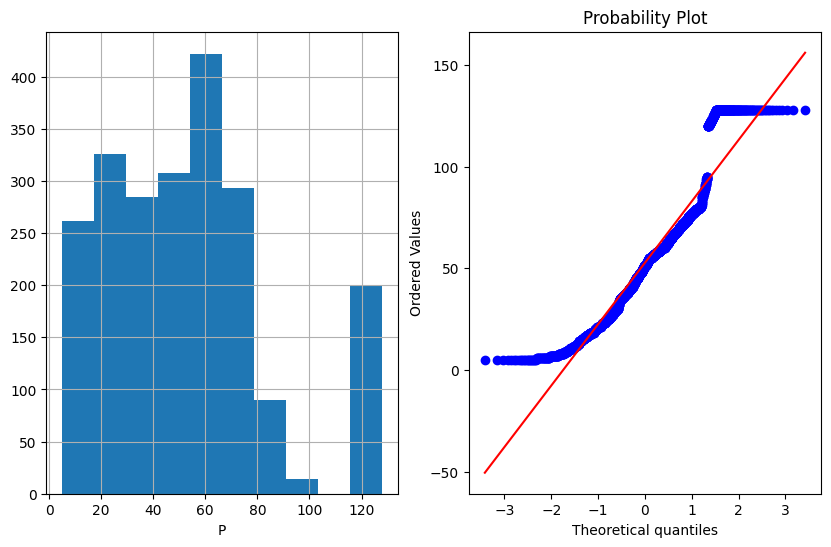

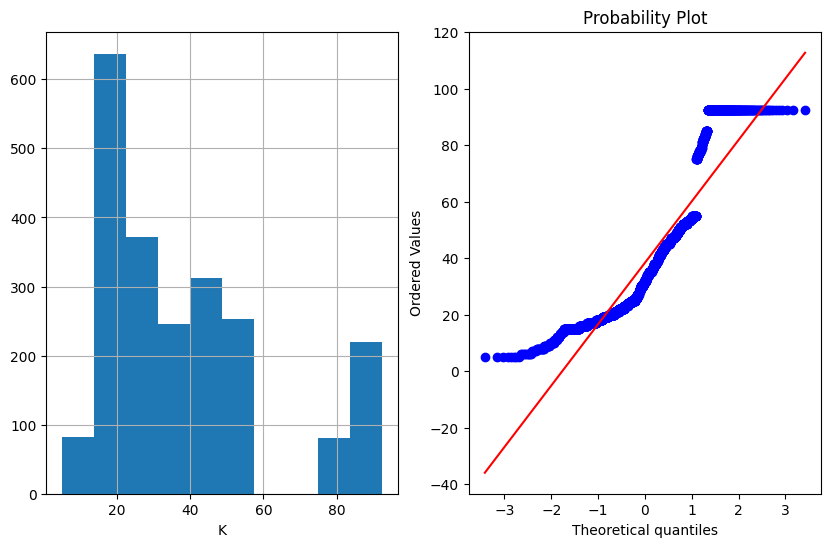

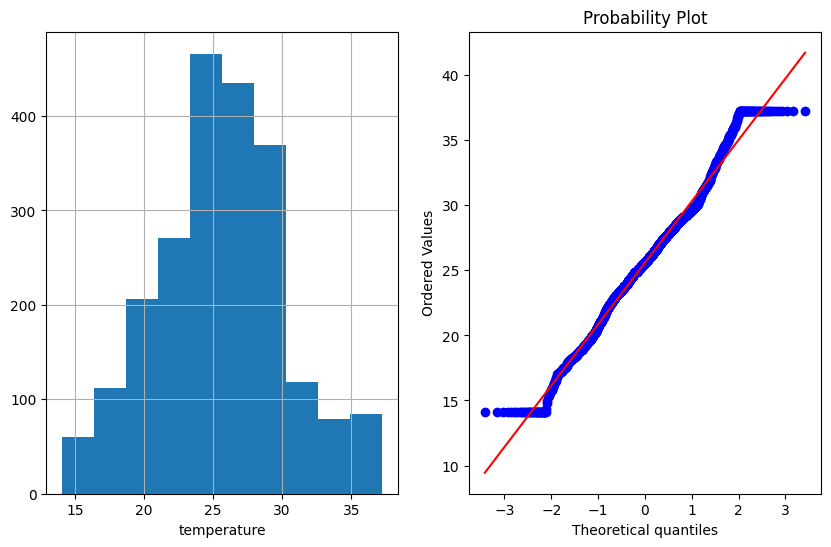

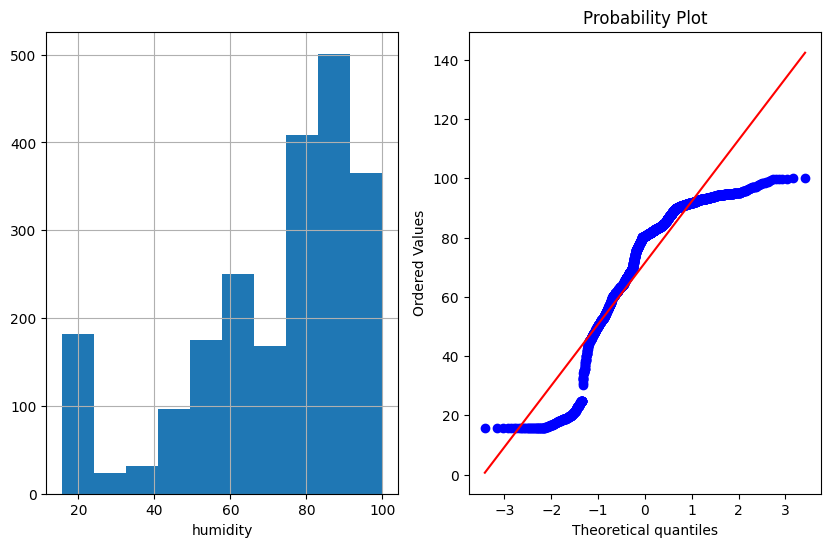

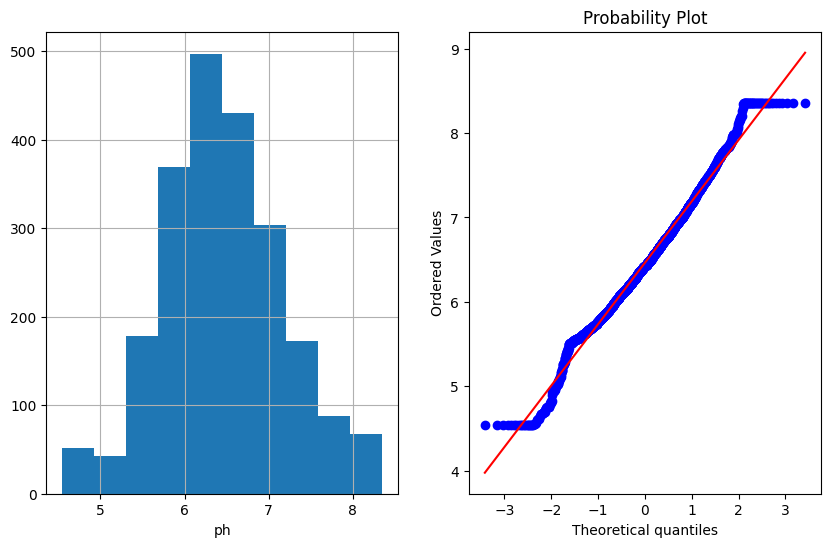

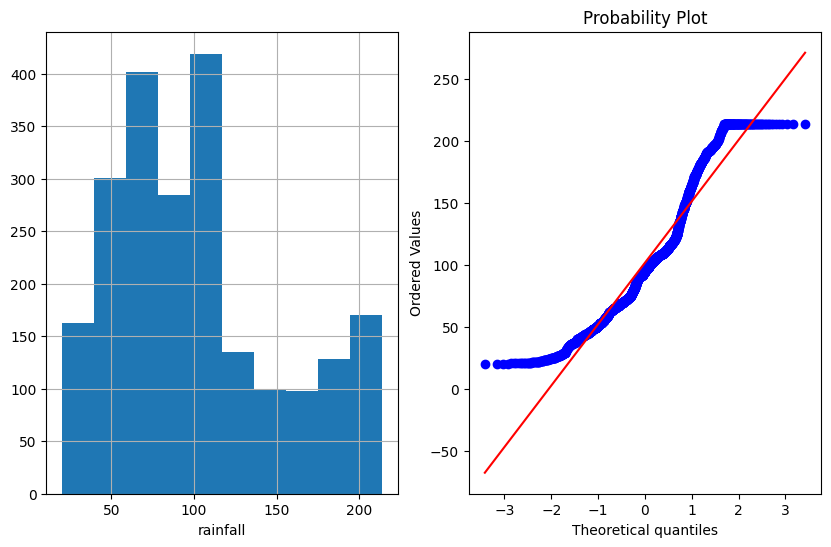

In [186]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plot_data(data,feature)

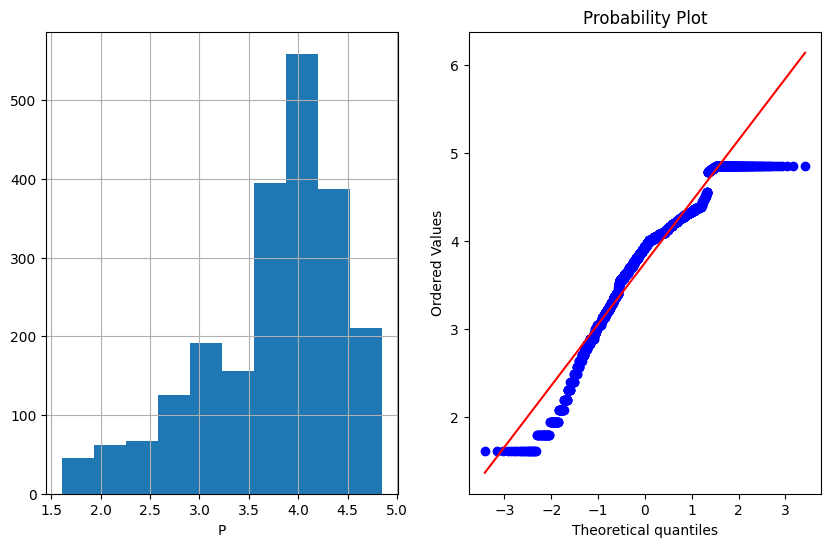

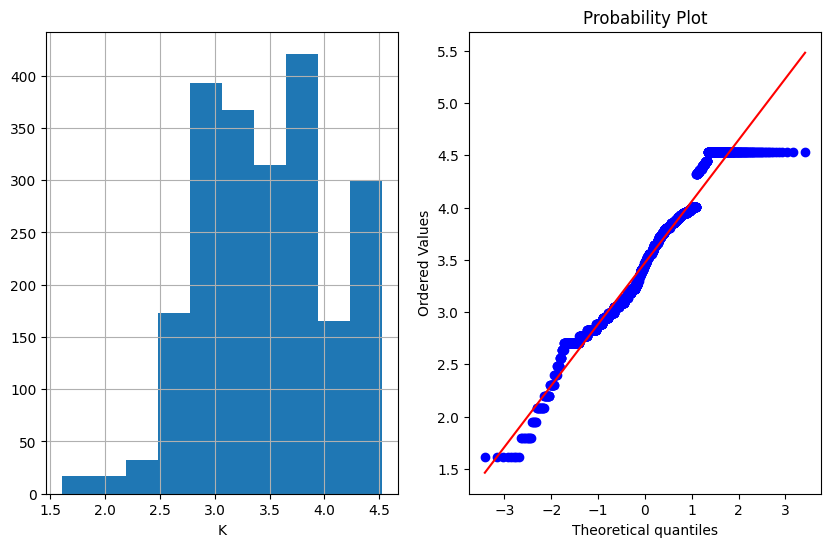

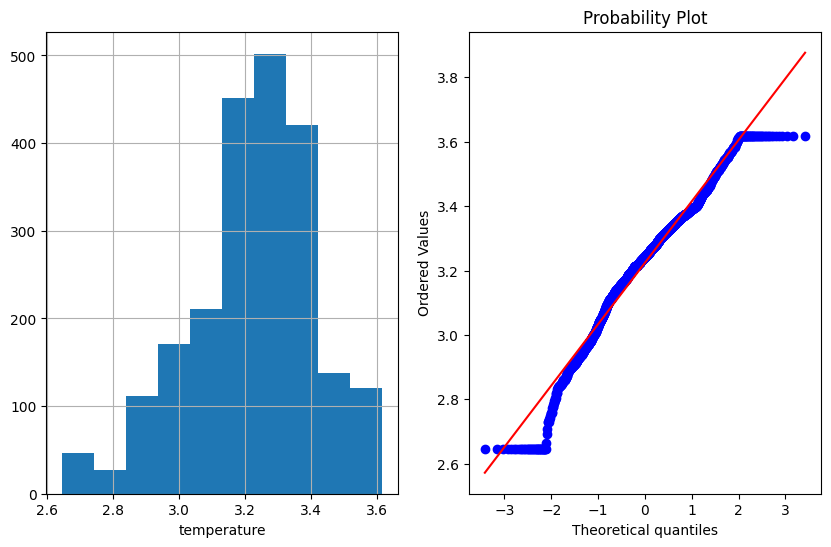

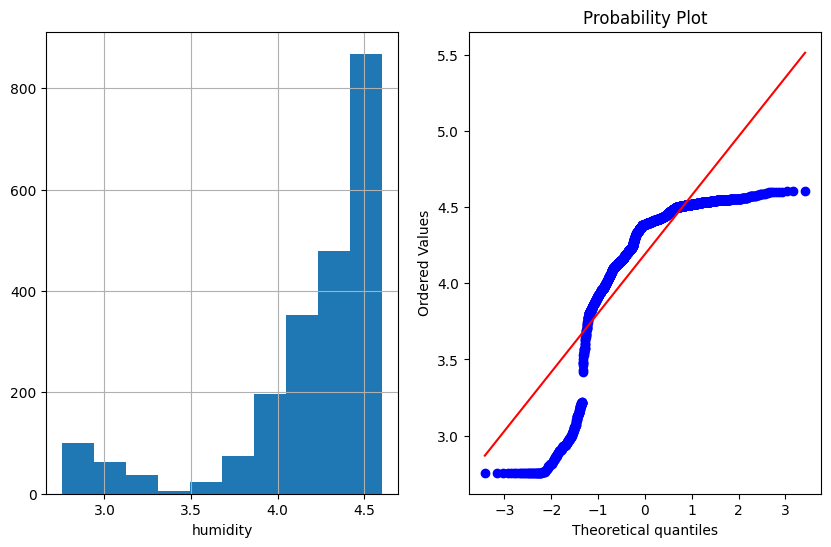

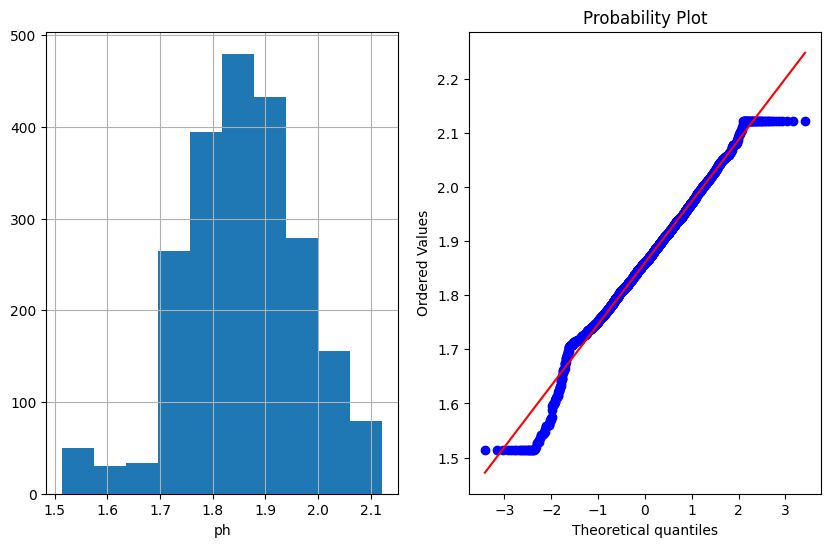

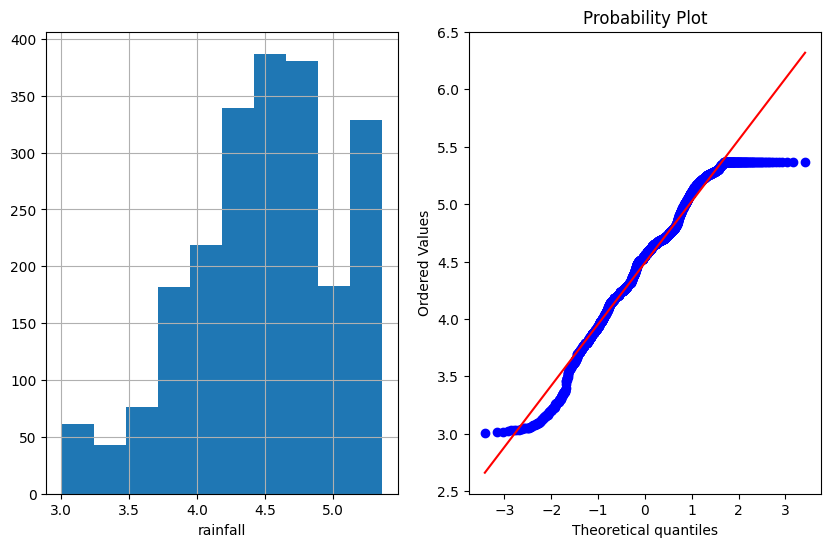

In [187]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
      c

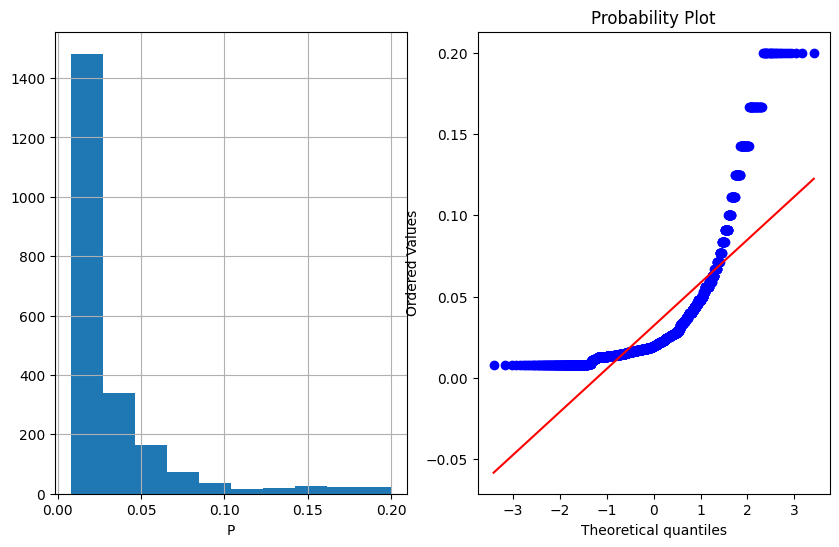

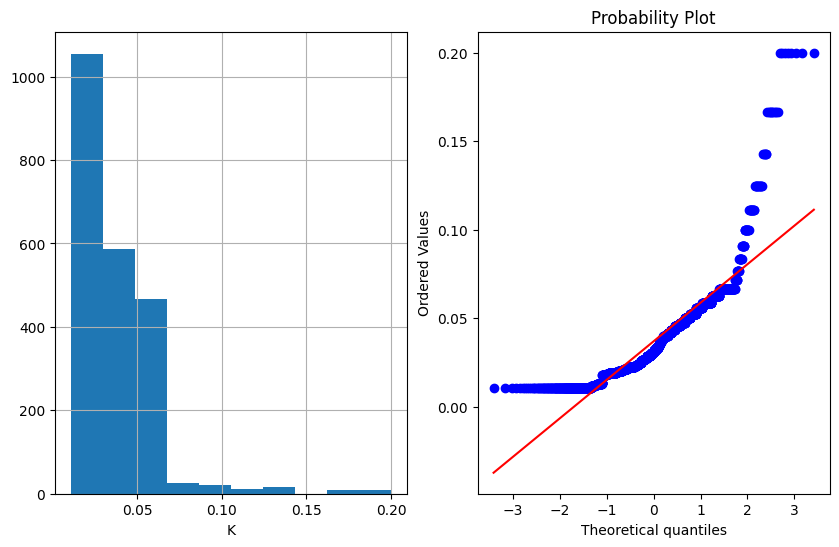

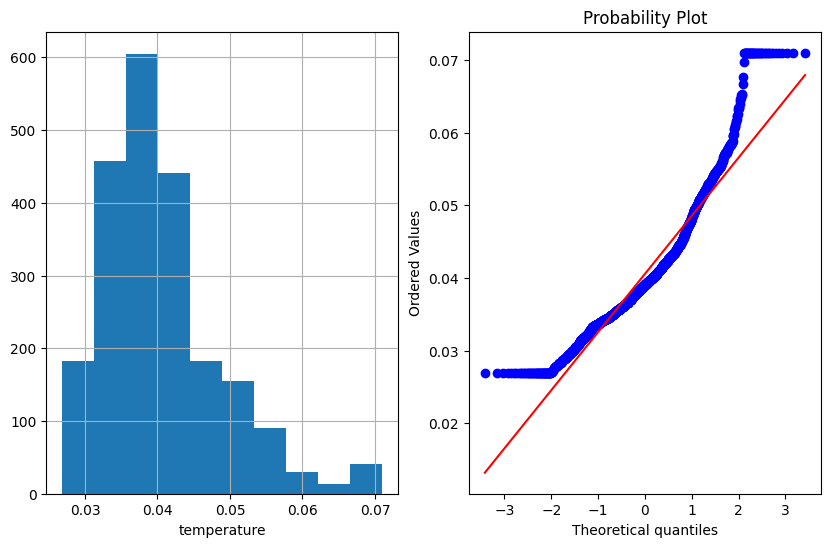

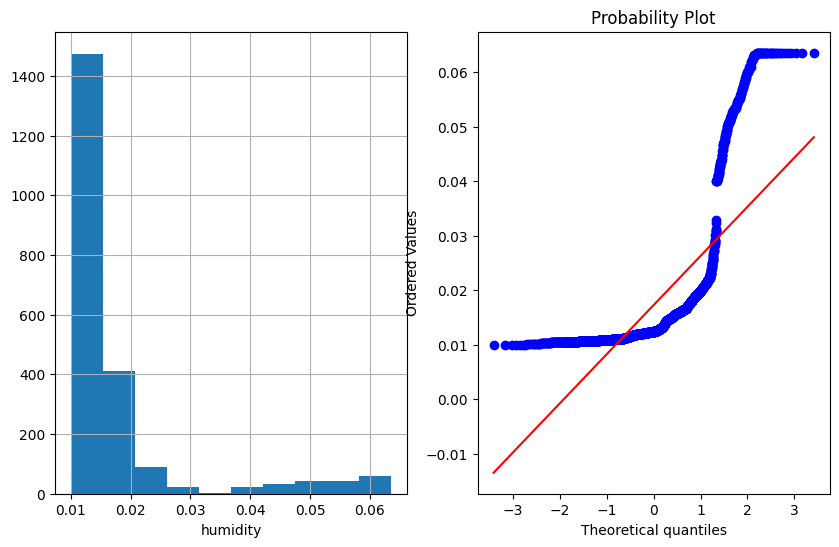

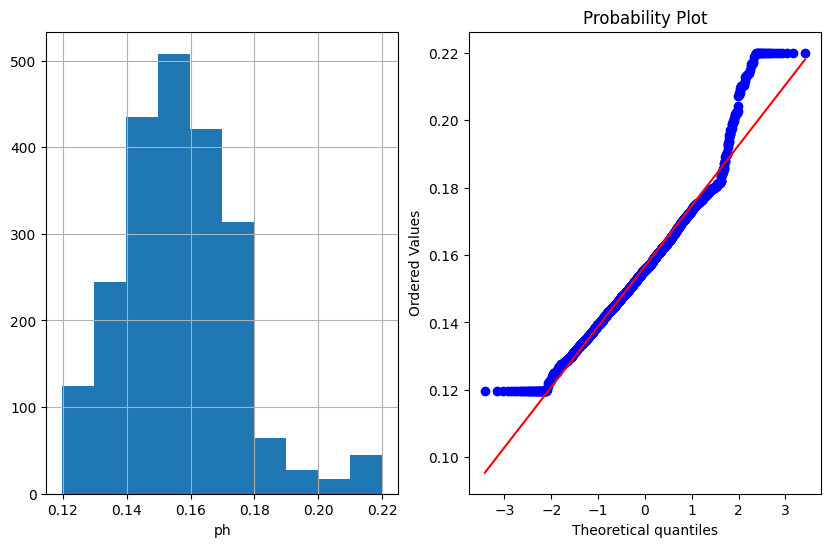

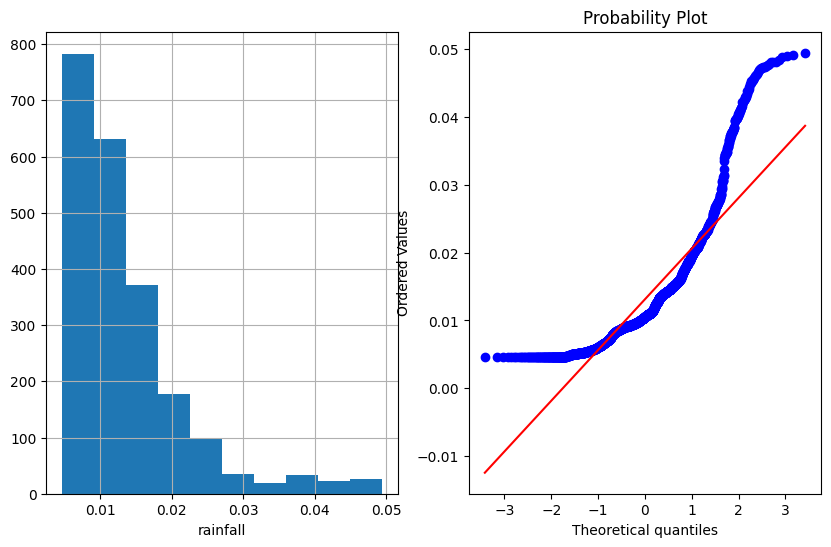

In [188]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=1/data[feature]
        plot_data(data,feature)

square transformation

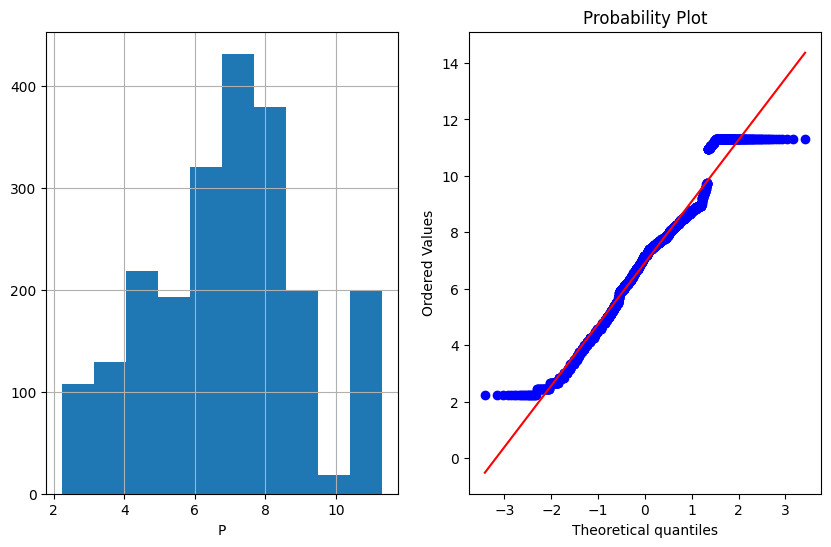

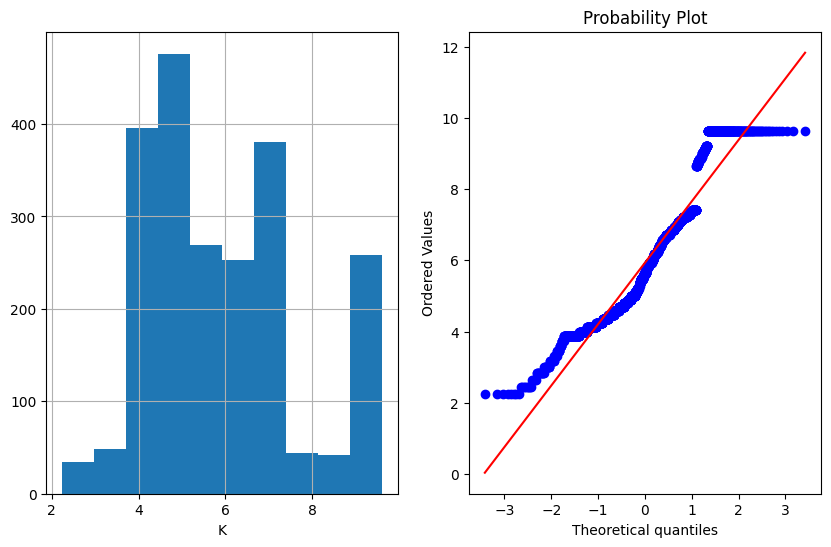

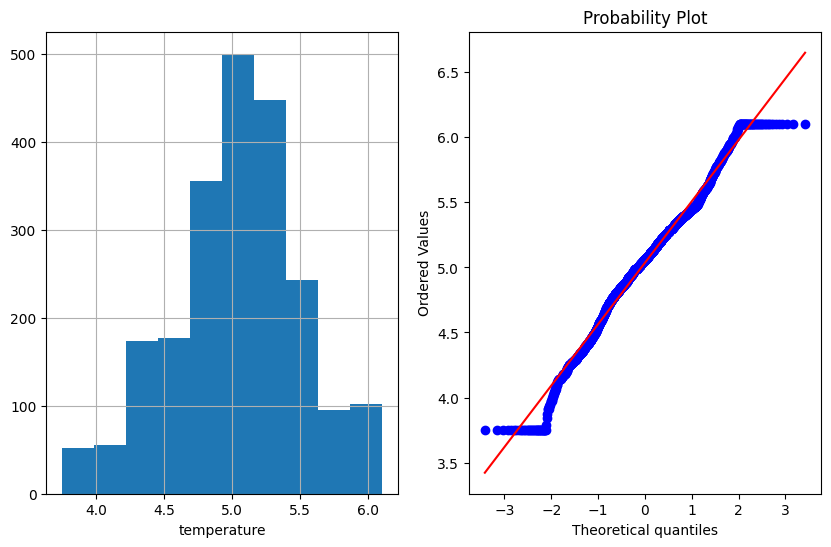

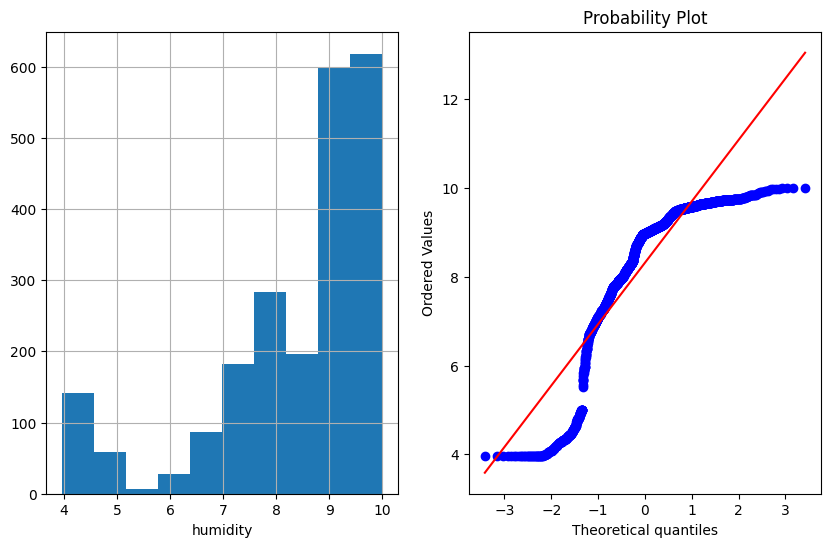

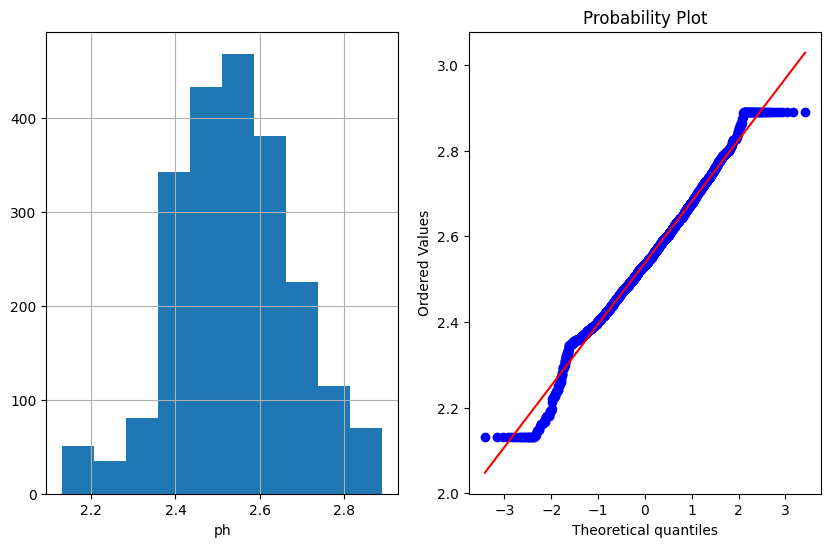

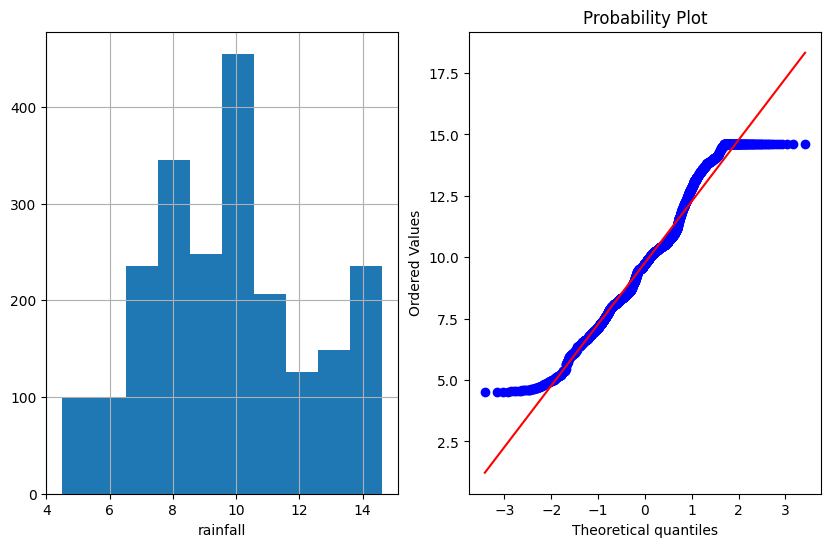

In [189]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=data[feature]**(1/2)
        plot_data(data,feature)

exponential transformation

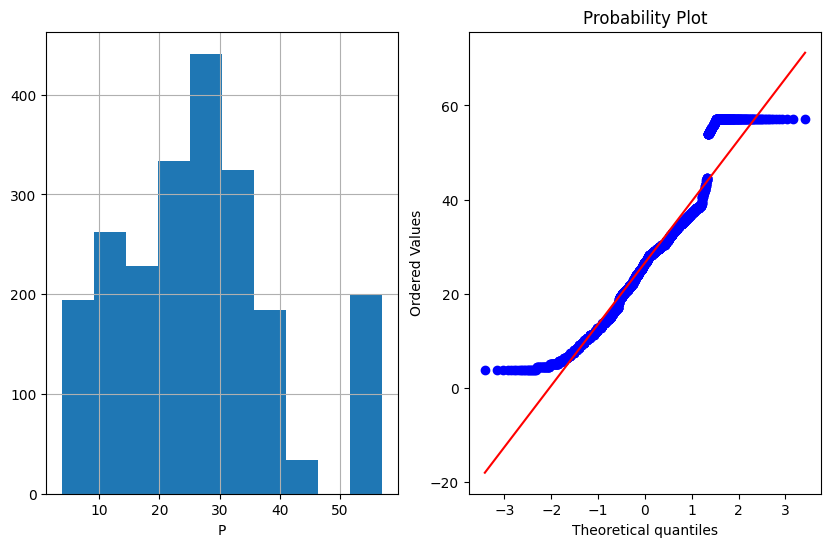

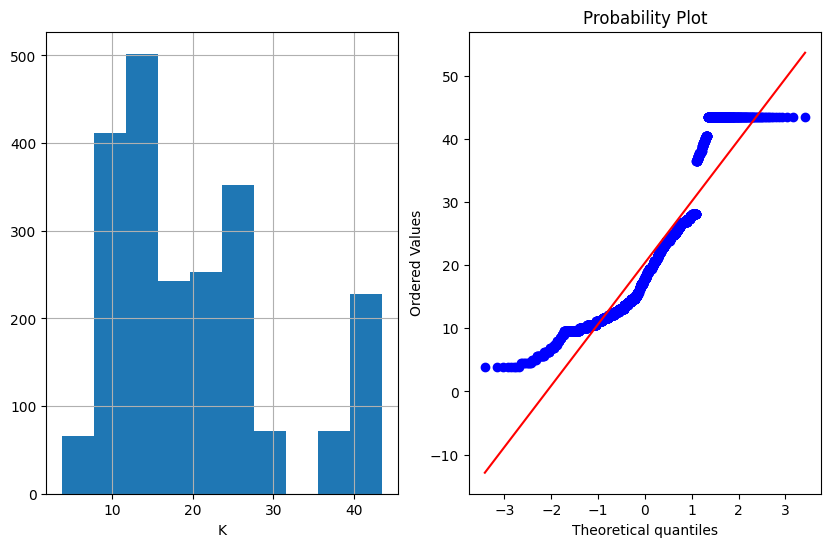

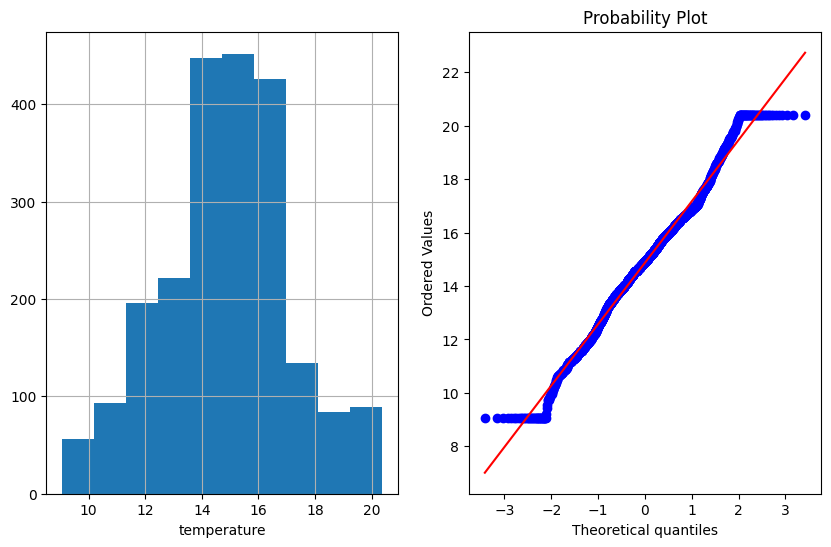

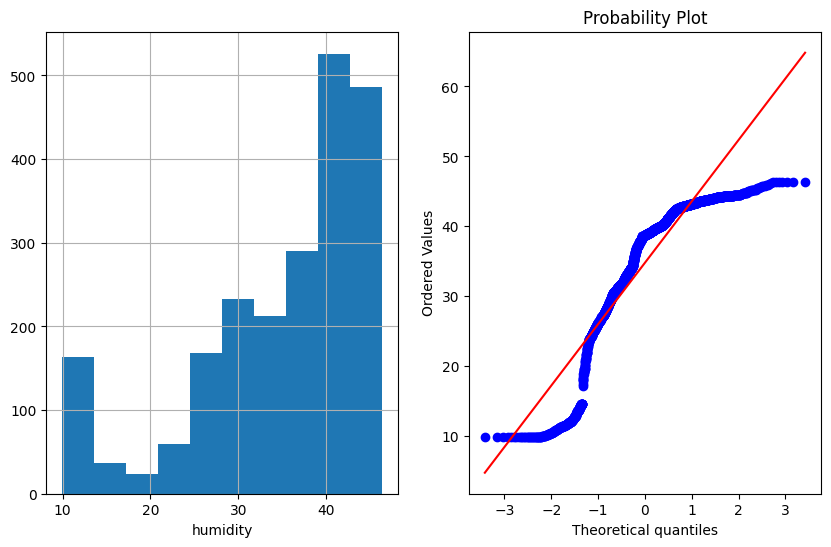

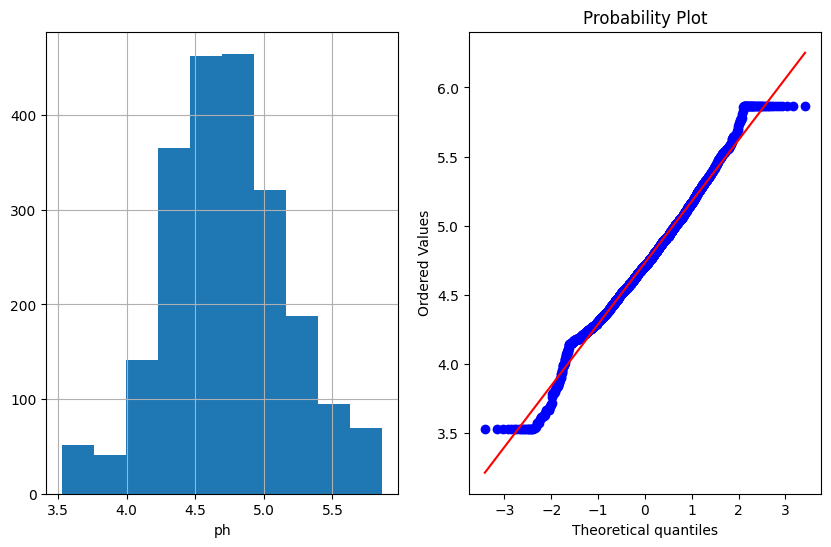

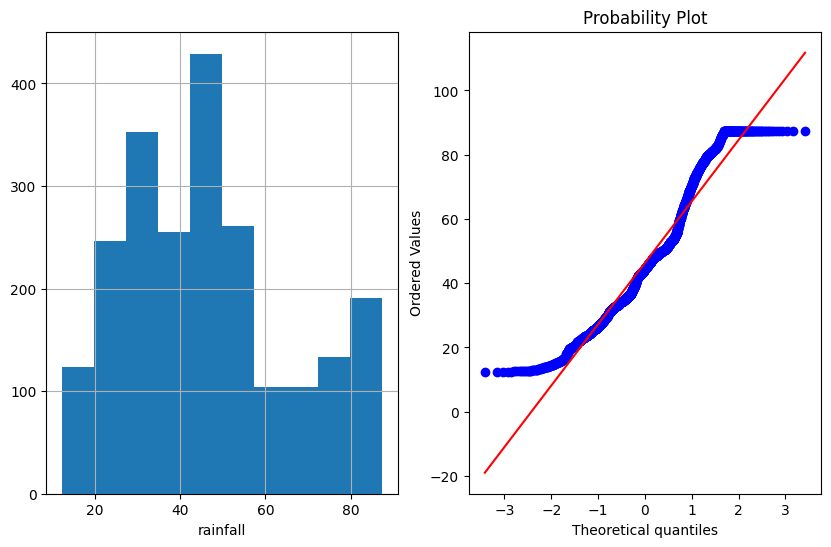

In [190]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=data[feature]**(1/1.2)
        plot_data(data,feature)

Boxcox Transformation

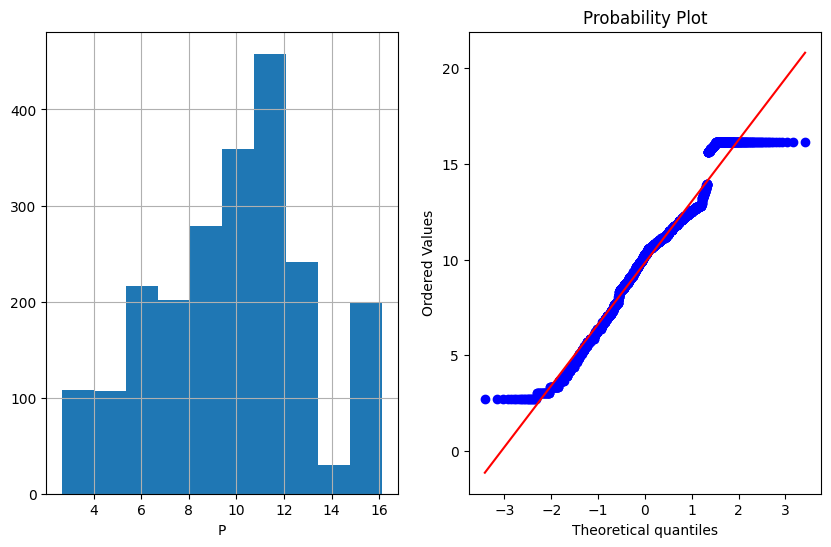

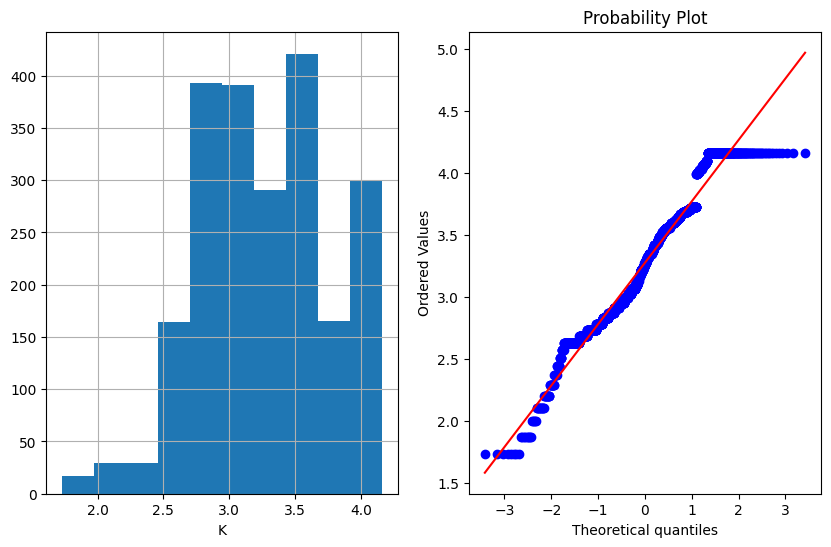

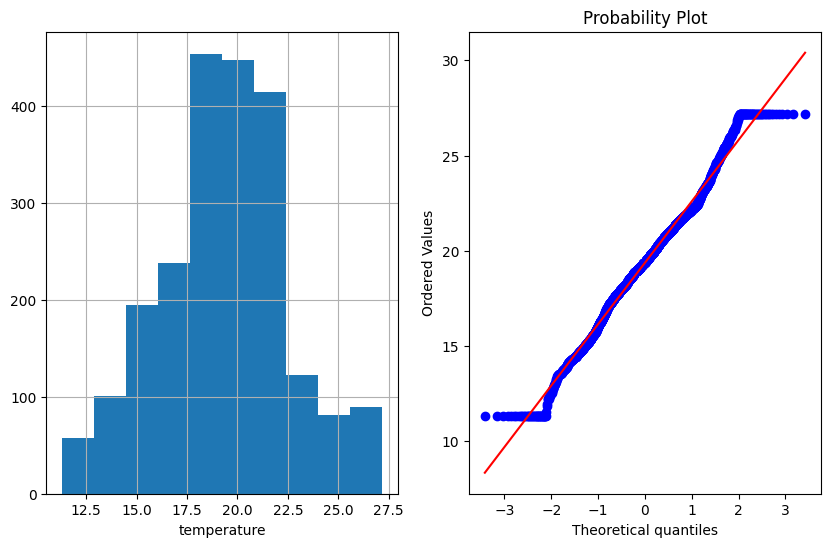

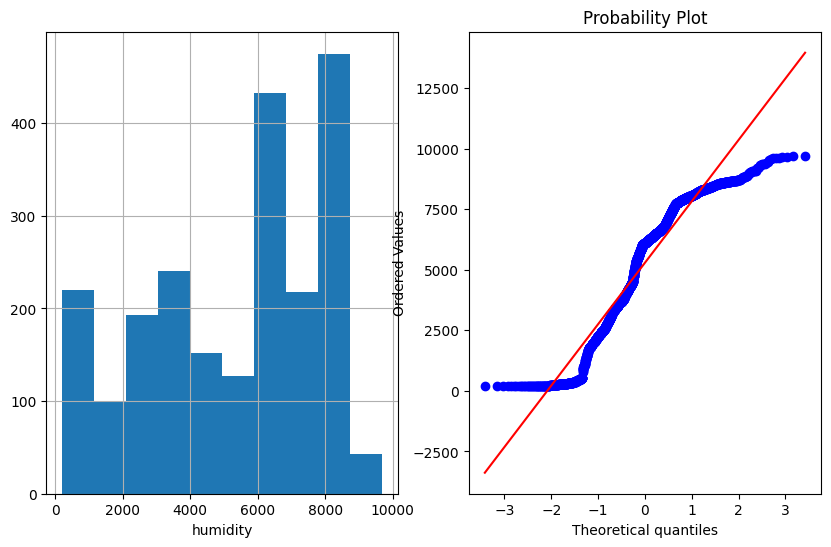

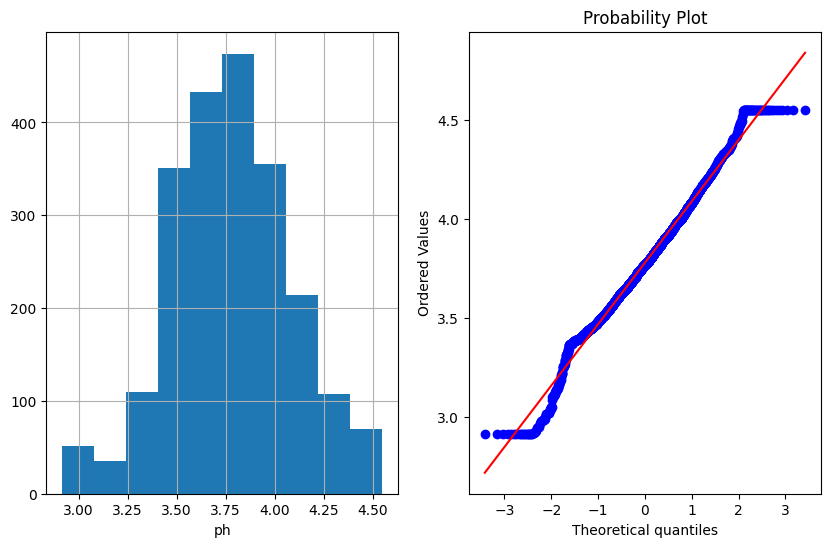

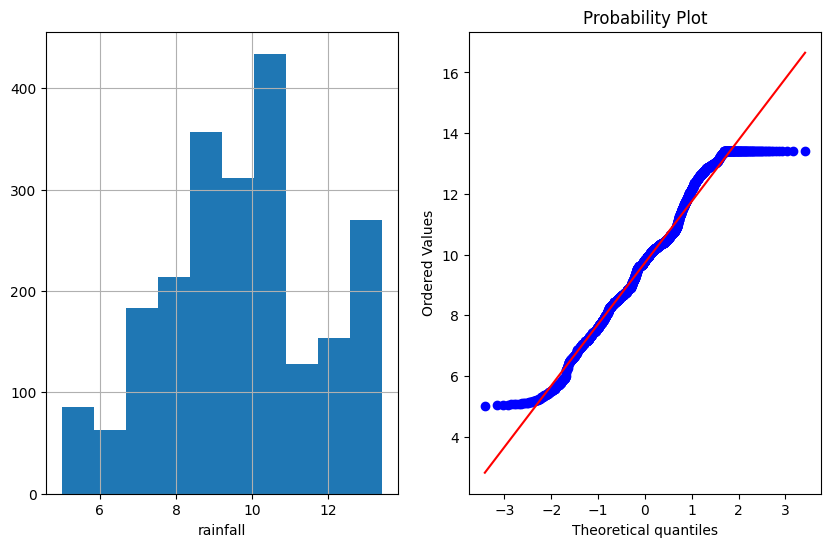

In [191]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature],parameter=stat.boxcox(data[feature]+1)
        plot_data(data,feature)

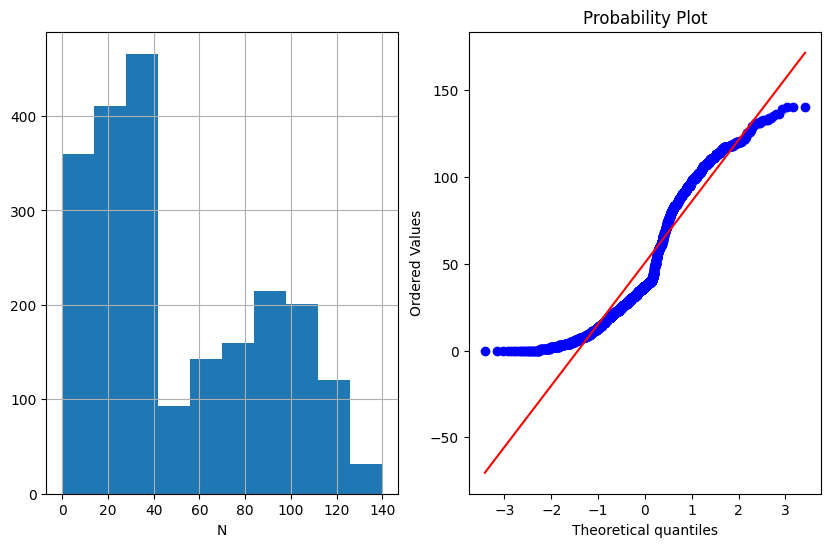

In [192]:

plot_data(df,'N')

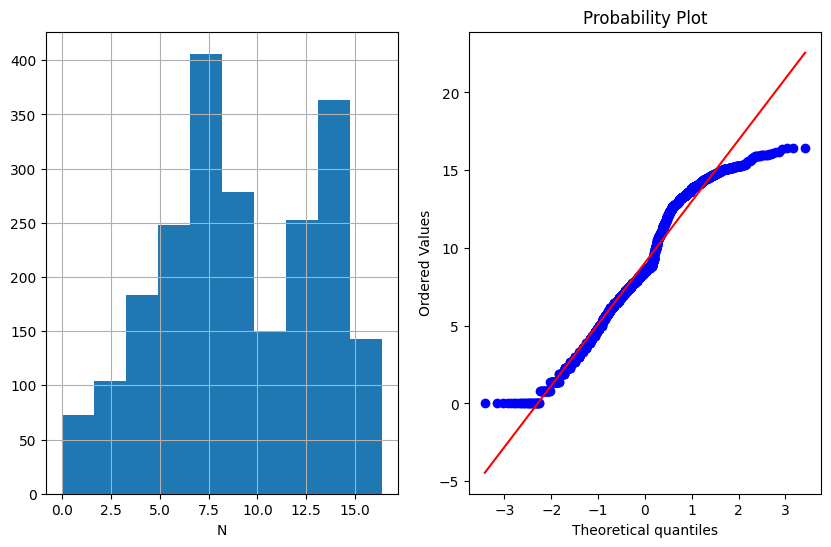

In [193]:
data=df.copy()
data['N'],parameters=stat.boxcox(data['N']+1)
plot_data(data,'N')

In [194]:
for feature in continuous_feature:
    df[feature],parameter=stat.boxcox(df[feature]+1)


In [195]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,13.271435,9.250219,3.520835,16.154343,6354.383065,3.800960,13.154367,rice
1,12.907665,10.914676,3.480600,16.774608,6079.869536,4.024764,13.414935,rice
2,10.871297,10.624509,3.540246,17.629284,6406.982319,4.348702,13.414935,rice
3,12.061288,8.408602,3.459730,20.017453,6053.905497,4.000944,13.414935,rice
4,12.376969,9.250219,3.500961,15.630089,6288.903619,4.264450,13.414935,rice
...,...,...,...,...,...,...,...,...
2195,14.427541,8.280886,3.270858,20.210052,4057.978610,3.917663,12.513687,coffee
2196,13.897857,5.278345,3.126840,20.645620,2894.733693,3.622217,11.028821,coffee
2197,15.119667,8.151049,3.216164,18.405616,4164.064923,3.741135,12.393870,coffee
2198,15.058334,8.018990,3.322213,19.868754,2428.492995,3.908767,11.003649,coffee


/tmp/ipykernel_751/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

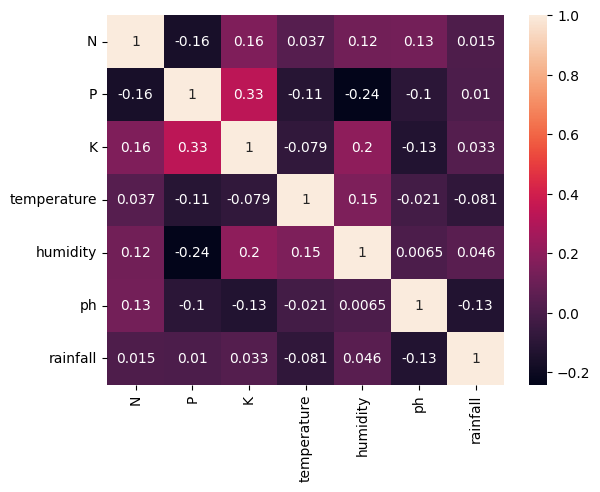

In [196]:
sns.heatmap(df.corr(),annot=True)

In [197]:
categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_feature

['label']

In [198]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [199]:
df.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

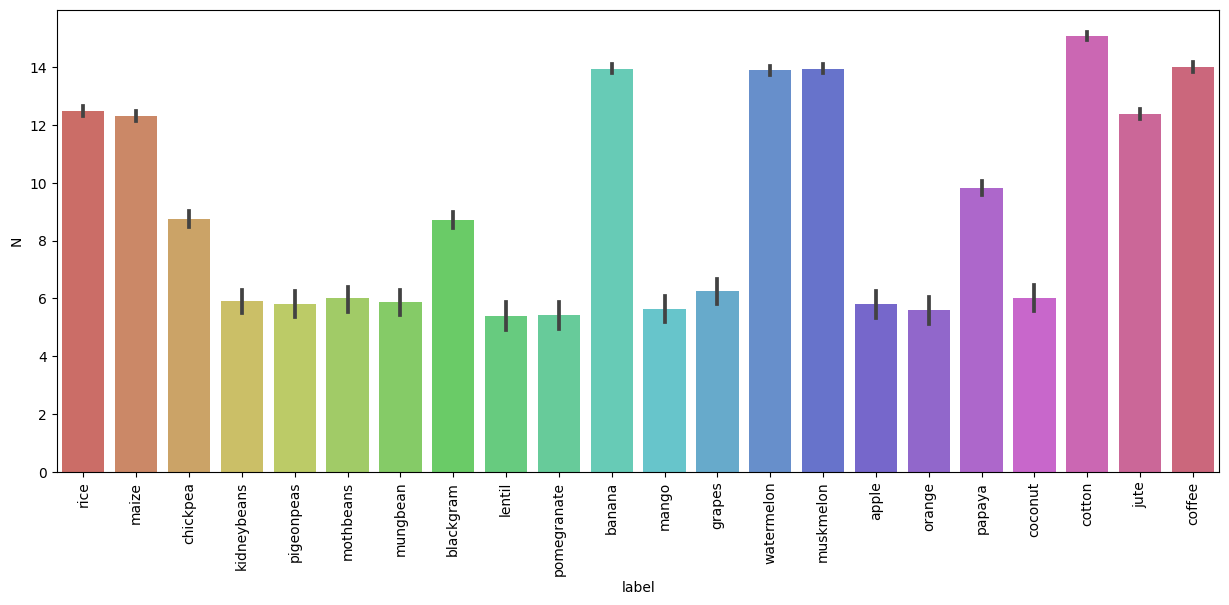

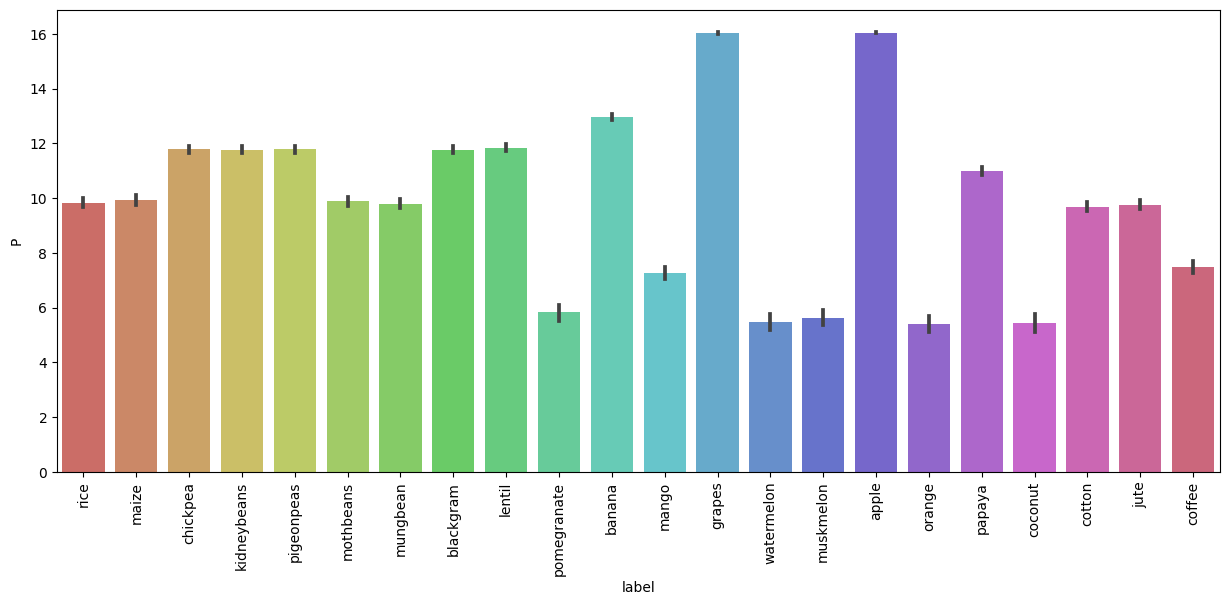

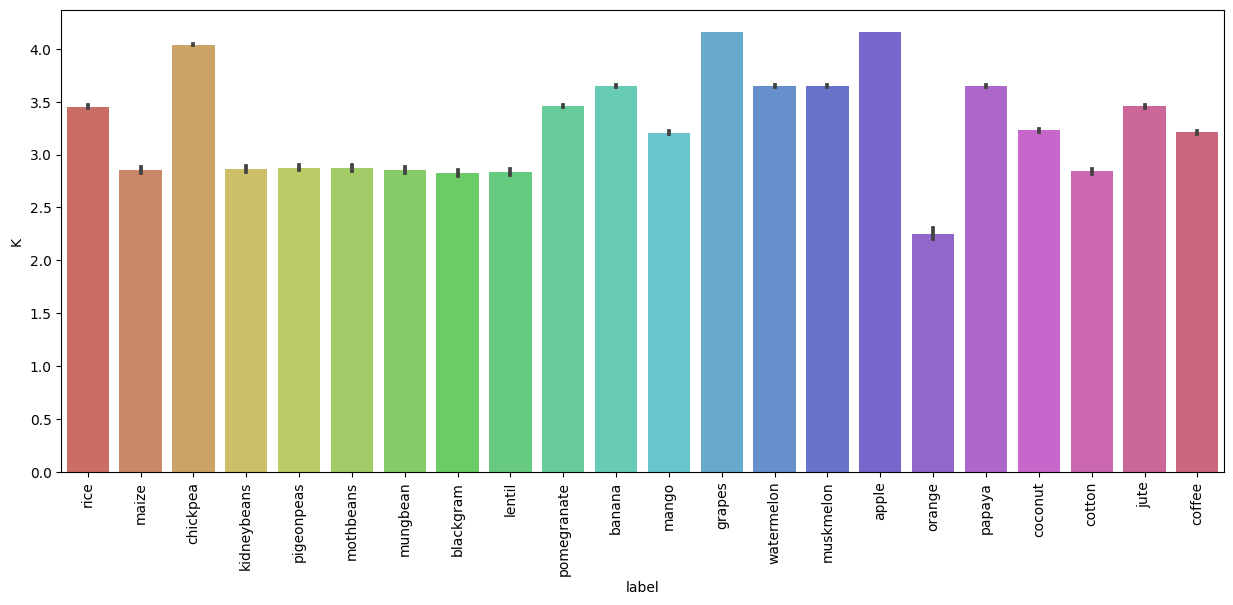

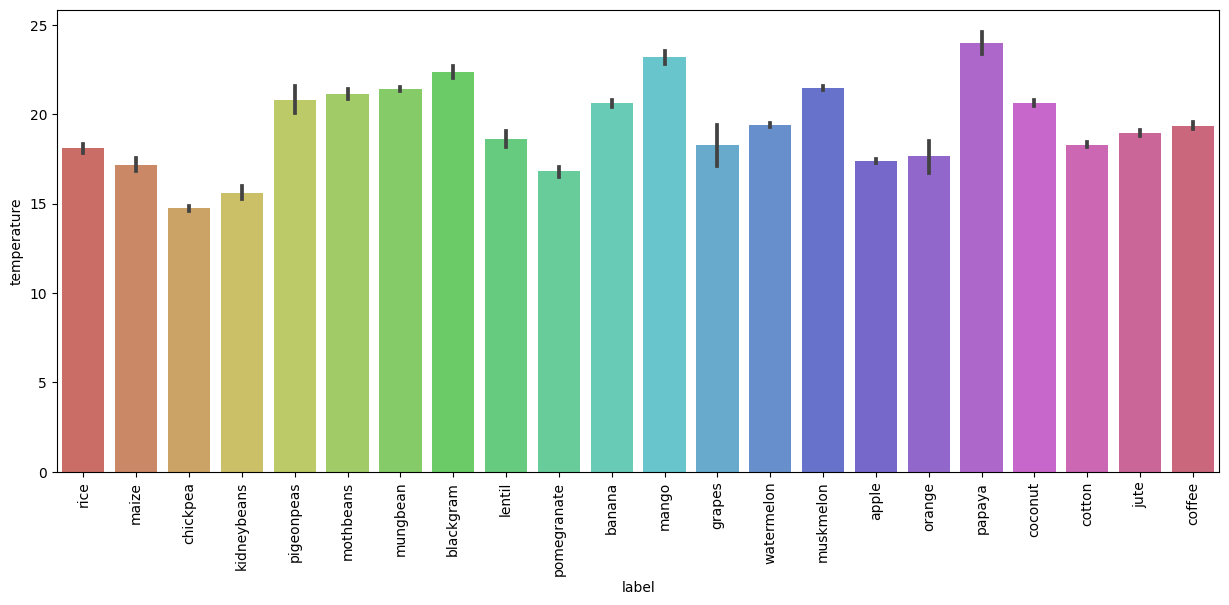

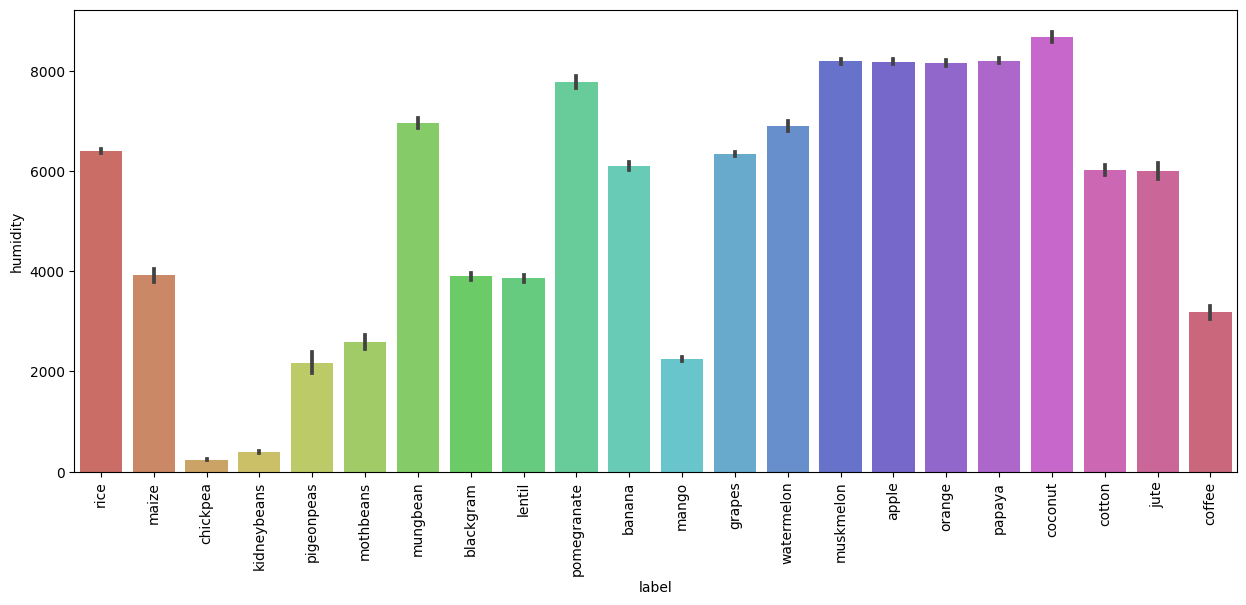

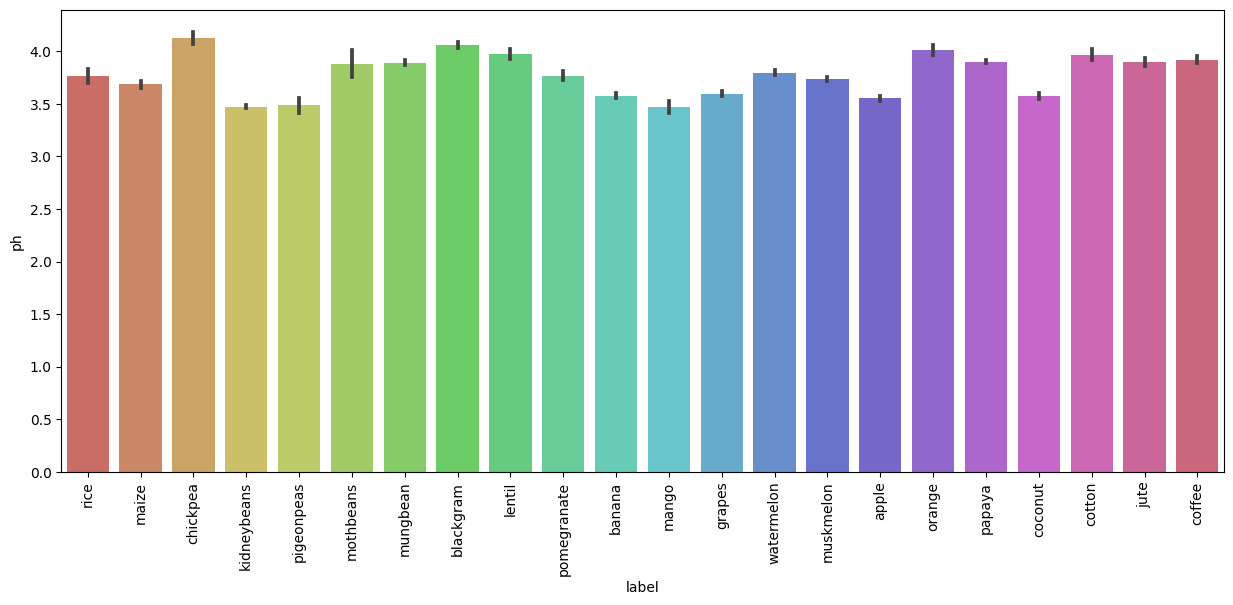

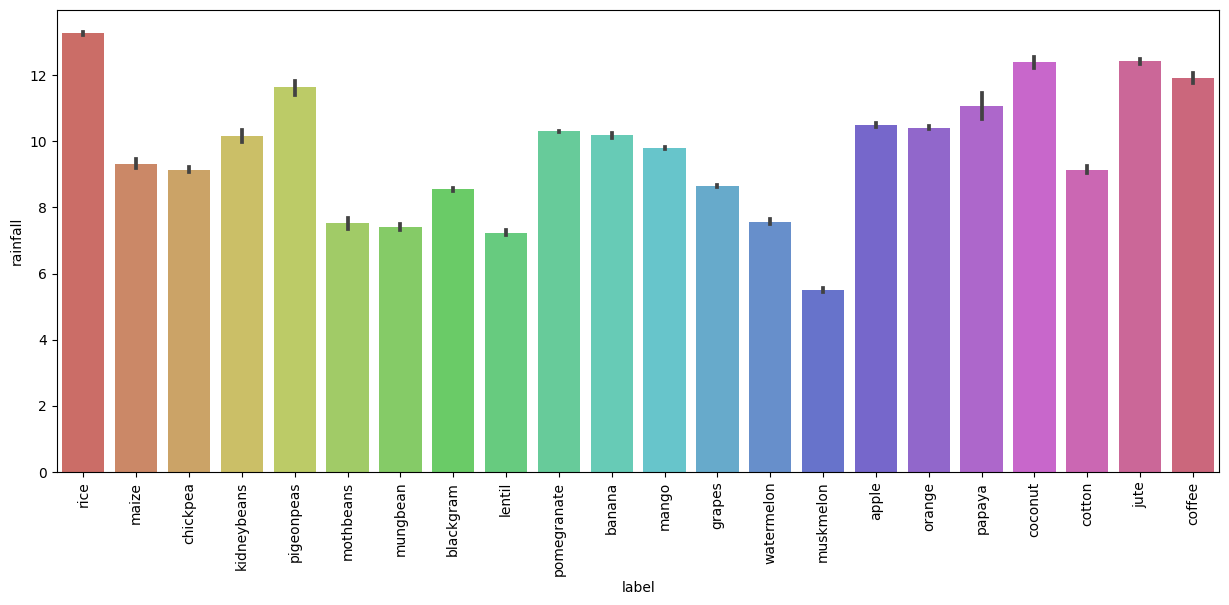

In [200]:
for feature in continuous_feature:
    data=df
    plt.figure(figsize=(15,6))
    sns.barplot(x='label',y=feature,data=data,palette='hls')
    plt.xticks(rotation=90)
    plt.show()

scaling

In [201]:
feature_scale=[feature for feature in df.columns if feature not in ['label']]

In [202]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,13.271435,9.250219,3.520835,16.154343,6354.383065,3.800960,13.154367,rice
1,12.907665,10.914676,3.480600,16.774608,6079.869536,4.024764,13.414935,rice
2,10.871297,10.624509,3.540246,17.629284,6406.982319,4.348702,13.414935,rice
3,12.061288,8.408602,3.459730,20.017453,6053.905497,4.000944,13.414935,rice
4,12.376969,9.250219,3.500961,15.630089,6288.903619,4.264450,13.414935,rice
...,...,...,...,...,...,...,...,...
2195,14.427541,8.280886,3.270858,20.210052,4057.978610,3.917663,12.513687,coffee
2196,13.897857,5.278345,3.126840,20.645620,2894.733693,3.622217,11.028821,coffee
2197,15.119667,8.151049,3.216164,18.405616,4164.064923,3.741135,12.393870,coffee
2198,15.058334,8.018990,3.322213,19.868754,2428.492995,3.908767,11.003649,coffee


In [203]:
data=df

In [204]:
y=data['label']

In [205]:
x=df.drop(['label'],axis=1)

In [206]:
from sklearn.preprocessing import StandardScaler
min_max=StandardScaler()
min_max=min_max.fit_transform(x)
df_minmax=pd.DataFrame(min_max,columns=x.columns)
df_minmax.head()

,N,P,K,temperature,humidity,ph,rainfall
0,1.051047,-0.179125,0.488137,-0.992829,0.405053,0.073855,1.676938
1,0.960517,0.333205,0.408059,-0.801257,0.300619,0.793990,1.804588
2,0.453737,0.243890,0.526769,-0.537285,0.425063,1.836330,1.804588
3,0.749884,-0.438179,0.366521,0.200315,0.290741,0.717347,1.804588
4,0.828446,-0.179125,0.448581,-1.154748,0.380142,1.565233,1.804588


In [207]:
d1 = pd.concat([df[['label']].reset_index(drop=True),pd.DataFrame(df_minmax, columns=feature_scale)],axis=1)

In [208]:
d1.head()

,label,N,P,K,temperature,humidity,ph,rainfall
0,rice,1.051047,-0.179125,0.488137,-0.992829,0.405053,0.073855,1.676938
1,rice,0.960517,0.333205,0.408059,-0.801257,0.300619,0.793990,1.804588
2,rice,0.453737,0.243890,0.526769,-0.537285,0.425063,1.836330,1.804588
3,rice,0.749884,-0.438179,0.366521,0.200315,0.290741,0.717347,1.804588
4,rice,0.828446,-0.179125,0.448581,-1.154748,0.380142,1.565233,1.804588


In [209]:
data.to_csv('croprecommend_train.csv',index=False)

In [210]:
d1=pd.read_csv('croprecommend_train.csv')

In [211]:
d1

,N,P,K,temperature,humidity,ph,rainfall,label
0,13.271435,9.250219,3.520835,16.154343,6354.383065,3.800960,13.154367,rice
1,12.907665,10.914676,3.480600,16.774608,6079.869536,4.024764,13.414935,rice
2,10.871297,10.624509,3.540246,17.629284,6406.982319,4.348702,13.414935,rice
3,12.061288,8.408602,3.459730,20.017453,6053.905497,4.000944,13.414935,rice
4,12.376969,9.250219,3.500961,15.630089,6288.903619,4.264450,13.414935,rice
...,...,...,...,...,...,...,...,...
2195,14.427541,8.280886,3.270858,20.210052,4057.978610,3.917663,12.513687,coffee
2196,13.897857,5.278345,3.126840,20.645620,2894.733693,3.622217,11.028821,coffee
2197,15.119667,8.151049,3.216164,18.405616,4164.064923,3.741135,12.393870,coffee
2198,15.058334,8.018990,3.322213,19.868754,2428.492995,3.908767,11.003649,coffee


 Splitting into train and test data


In [212]:
cropnew=d1

In [213]:
cropnew

,N,P,K,temperature,humidity,ph,rainfall,label
0,13.271435,9.250219,3.520835,16.154343,6354.383065,3.800960,13.154367,rice
1,12.907665,10.914676,3.480600,16.774608,6079.869536,4.024764,13.414935,rice
2,10.871297,10.624509,3.540246,17.629284,6406.982319,4.348702,13.414935,rice
3,12.061288,8.408602,3.459730,20.017453,6053.905497,4.000944,13.414935,rice
4,12.376969,9.250219,3.500961,15.630089,6288.903619,4.264450,13.414935,rice
...,...,...,...,...,...,...,...,...
2195,14.427541,8.280886,3.270858,20.210052,4057.978610,3.917663,12.513687,coffee
2196,13.897857,5.278345,3.126840,20.645620,2894.733693,3.622217,11.028821,coffee
2197,15.119667,8.151049,3.216164,18.405616,4164.064923,3.741135,12.393870,coffee
2198,15.058334,8.018990,3.322213,19.868754,2428.492995,3.908767,11.003649,coffee


In [214]:
y=cropnew['label']

In [318]:
x=cropnew[['N','P','K','temperature','humidity','ph','rainfall']]

In [319]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,13.271435,9.250219,3.520835,16.154343,6354.383065,3.800960,13.154367
1,12.907665,10.914676,3.480600,16.774608,6079.869536,4.024764,13.414935
2,10.871297,10.624509,3.540246,17.629284,6406.982319,4.348702,13.414935
3,12.061288,8.408602,3.459730,20.017453,6053.905497,4.000944,13.414935
4,12.376969,9.250219,3.500961,15.630089,6288.903619,4.264450,13.414935
...,...,...,...,...,...,...,...
2195,14.427541,8.280886,3.270858,20.210052,4057.978610,3.917663,12.513687
2196,13.897857,5.278345,3.126840,20.645620,2894.733693,3.622217,11.028821
2197,15.119667,8.151049,3.216164,18.405616,4164.064923,3.741135,12.393870
2198,15.058334,8.018990,3.322213,19.868754,2428.492995,3.908767,11.003649


In [320]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [321]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])

In [322]:
min_max

array([[ 1.05104656, -0.1791246 ,  0.48813667, ...,  0.40505261,
         0.07385466,  1.67693806],
       [ 0.96051715,  0.33320484,  0.40805854, ...,  0.30061894,
         0.79399037,  1.80458803],
       [ 0.45373696,  0.2438898 ,  0.52676929, ...,  0.42506304,
         1.83632979,  1.80458803],
       ...,
       [ 1.51100624, -0.51745572, -0.11823855, ..., -0.42821404,
        -0.11864313,  1.30437858],
       [ 1.49574275, -0.55810405,  0.09282624, ..., -1.08848077,
         0.4207453 ,  0.62332287],
       [ 1.29001962, -1.22418089, -0.11823855, ..., -0.75036413,
         0.44905887,  0.84223824]])

In [323]:
cropnew

,N,P,K,temperature,humidity,ph,rainfall,label
0,13.271435,9.250219,3.520835,16.154343,6354.383065,3.800960,13.154367,rice
1,12.907665,10.914676,3.480600,16.774608,6079.869536,4.024764,13.414935,rice
2,10.871297,10.624509,3.540246,17.629284,6406.982319,4.348702,13.414935,rice
3,12.061288,8.408602,3.459730,20.017453,6053.905497,4.000944,13.414935,rice
4,12.376969,9.250219,3.500961,15.630089,6288.903619,4.264450,13.414935,rice
...,...,...,...,...,...,...,...,...
2195,14.427541,8.280886,3.270858,20.210052,4057.978610,3.917663,12.513687,coffee
2196,13.897857,5.278345,3.126840,20.645620,2894.733693,3.622217,11.028821,coffee
2197,15.119667,8.151049,3.216164,18.405616,4164.064923,3.741135,12.393870,coffee
2198,15.058334,8.018990,3.322213,19.868754,2428.492995,3.908767,11.003649,coffee


In [324]:
vif_score(x)

,FEATURE,VIF_SCORE
0,N,1.108220
1,P,1.327848
2,K,1.337950
3,temperature,1.050812
4,humidity,1.205347
5,ph,1.061590
6,rainfall,1.028474


In [336]:
x=cropnew[['N','P','K','temperature','humidity','ph','rainfall']]
y=cropnew['label']

In [341]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(min_max,y,test_size = 0.2,random_state =0)

In [342]:
acc=[]
modelname=[]

In [343]:
Xtrain

array([[-0.45950104,  1.7858461 ,  1.76581765, ...,  0.9875203 ,
        -0.46871163,  0.44546407],
       [ 0.88585272, -0.39949226,  0.28019404, ...,  0.79621926,
        -0.15690807,  0.98307154],
       [ 1.05104656,  0.36239269,  0.14167843, ...,  0.92578248,
         0.87362109,  1.32891538],
       ...,
       [-0.19636169,  0.50428411, -1.28604699, ..., -0.60712031,
         0.06997501, -0.5323203 ],
       [-0.07760548,  0.53189915, -0.56659906, ..., -0.33152384,
         1.63911363, -1.37866237],
       [-1.00564908, -1.01106109, -2.13422188, ...,  1.01524771,
         0.12870654,  0.37111285]])

Logistic Regression

In [344]:
lg=LogisticRegression(multi_class='multinomial', solver='lbfgs',random_state=0)
lg.fit(Xtrain,Ytrain)

predicted_values1=lg.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values1))
print(accuracy_score(Ytest,predicted_values1))
print(classification_report(Ytest,predicted_values1))

x=accuracy_score(Ytest,predicted_values1)
acc.append(x)
modelname.append('Logistic Regression')


[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 22  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [345]:
lg.predict(Xtrain)

array(['apple', 'jute', 'jute', ..., 'blackgram', 'lentil', 'orange'],
      dtype=object)

In [346]:
Ytrain

1567         apple
2031          jute
2073          jute
1374    watermelon
279       chickpea
           ...    
1033        banana
1731        papaya
763      blackgram
835         lentil
1653        orange
Name: label, Length: 1760, dtype: object

In [347]:
lg.score(Xtrain,Ytrain)

0.9761363636363637

In [348]:
lg.score(Xtest,Ytest)

0.9704545454545455

In [333]:
Xtrain

array([[-0.45950104,  1.7858461 ,  1.76581765, ...,  0.9875203 ,
        -0.46871163,  0.44546407],
       [ 0.88585272, -0.39949226,  0.28019404, ...,  0.79621926,
        -0.15690807,  0.98307154],
       [ 1.05104656,  0.36239269,  0.14167843, ...,  0.92578248,
         0.87362109,  1.32891538],
       ...,
       [-0.19636169,  0.50428411, -1.28604699, ..., -0.60712031,
         0.06997501, -0.5323203 ],
       [-0.07760548,  0.53189915, -0.56659906, ..., -0.33152384,
         1.63911363, -1.37866237],
       [-1.00564908, -1.01106109, -2.13422188, ...,  1.01524771,
         0.12870654,  0.37111285]])

In [311]:
Ytrain

1567         apple
2031          jute
2073          jute
1374    watermelon
279       chickpea
           ...    
1033        banana
1731        papaya
763      blackgram
835         lentil
1653        orange
Name: label, Length: 1760, dtype: object

In [314]:
lg.predict([Xtrain[3]])

array(['watermelon'], dtype=object)

In [225]:
x = metrics.accuracy_score(Ytest, predicted_values1)

In [226]:
print("Logistic Regression's Accuracy is: ", x)

Logistic Regression's Accuracy is:  0.9704545454545455


Making prediction using logistic regression

In [301]:
data = np.array([[90,42,43,20.879744,82.002744,6.502985,202.935536]])
prediction = lg.predict(data)
print(prediction)

['rice']


In [ ]:
data = np.array([[90,42,43,20.879744,82.002744,6.502985,202.935536]])
prediction = lg.predict(data)
print(prediction)

In [228]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/CRLogistic Regression.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(lg, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

DecisionTree

In [229]:
dt=DecisionTreeClassifier()
dt.fit(Xtrain,Ytrain)

predicted_values2=dt.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values2))
print(accuracy_score(Ytest,predicted_values2))
print(classification_report(Ytest,predicted_values2))

x=accuracy_score(Ytest,predicted_values2)
acc.append(x)
modelname.append('Decision Tree')


[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [230]:
dt.score(Xtrain,Ytrain)

1.0

In [231]:
dt.score(Xtest,Ytest)

0.990909090909091

In [232]:
x1=df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
y1= df['label']

In [296]:
y1.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [233]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dt,x1,y1,cv=5)
score

array([0.99090909, 0.98409091, 0.99090909, 0.98863636, 0.98409091])

saved training decision tree model

In [234]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(dt, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

RandomForestClassifier

In [235]:
rf = RandomForestClassifier(random_state=0)
rf.fit(Xtrain,Ytrain)

predicted_values3 = rf.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values3))
print(accuracy_score(Ytest,predicted_values3))
print(classification_report(Ytest,predicted_values3))

x=accuracy_score(Ytest,predicted_values3)
acc.append(x)
modelname.append('RandomForestClassifier')

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [236]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dt,x1,y1,cv=5)
score

array([0.98636364, 0.98409091, 0.99318182, 0.99318182, 0.98409091])

In [237]:
rf.score(Xtrain,Ytrain)

1.0

In [238]:
rf.score(Xtest,Ytest)

0.9977272727272727

saved training RandomForestClassifier model

In [239]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(rf, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

Guassian Naive Bayes

In [240]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(Xtrain,Ytrain)

predicted_values4 = nb.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values4))
print(accuracy_score(Ytest,predicted_values4))
print(classification_report(Ytest,predicted_values4))

x=accuracy_score(Ytest,predicted_values4)
acc.append(x)
modelname.append('Guassian Naive Bayes')

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [241]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(nb,x1,y1,cv=5)
score

array([0.99545455, 0.99318182, 0.99545455, 0.99545455, 0.99090909])

In [242]:
nb.score(Xtrain,Ytrain)

0.9943181818181818

In [243]:
nb.score(Xtest,Ytest)

0.9954545454545455

saved training Guassian Naive Bayes model

In [244]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/CRGuassian Naive Bayes.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(nb, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

Support Vector Machine

In [245]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(Xtrain,Ytrain)

predicted_values5 = SVM.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values5))
print(accuracy_score(Ytest,predicted_values5))
print(classification_report(Ytest,predicted_values5))

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 24  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [246]:
SVM.score(Xtrain,Ytrain)

0.990909090909091

In [247]:
nb.score(Xtest,Ytest)

0.9954545454545455

In [248]:
svc= SVC()
svc.fit(Xtrain,Ytrain)

SVC()

In [249]:
svc.score(Xtrain,Ytrain)

0.990909090909091

In [250]:
svc.score(Xtest,Ytest)

0.9886363636363636

In [251]:
param ={"kernel":['linear', 'poly', 'rbf', 'sigmoid' ],
        'C':[.1,.4 , .6 , 1,2,3,100,200,500],
        'gamma':[.001,.1,.4,.004,.003]
    } 
svm_grid = GridSearchCV(svc , param_grid=param , verbose=3 )
svm_grid.fit(Xtrain,Ytrain)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.972 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.966 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.974 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.955 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.983 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.048 total time=   0.2s
[CV 2/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.048 total time=   0.2s
[CV 3/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.082 total time=   0.2s
[CV 4/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.048 total time=   0.2s
[CV 5/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.048 total time=   0.2s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.048 total time=   0.2s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rb

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.4, 0.6, 1, 2, 3, 100, 200, 500],
                         'gamma': [0.001, 0.1, 0.4, 0.004, 0.003],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [252]:
svm_grid.best_params_

{'C': 500, 'gamma': 0.001, 'kernel': 'linear'}

In [253]:
svc1 = SVC(C= 500, gamma= 0.001, kernel= 'linear')
svc1.fit(Xtrain,Ytrain)

pred5=svc1.predict(Xtest)
print(confusion_matrix(Ytest,pred5))
print(accuracy_score(Ytest,pred5))
print(classification_report(Ytest,pred5))

x=accuracy_score(Ytest,pred5)
acc.append(x)
modelname.append('support Vector Machine')


[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 24  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [276]:
pred5

array(['watermelon', 'watermelon', 'grapes', 'chickpea', 'blackgram',
       'rice', 'mothbeans', 'kidneybeans', 'muskmelon', 'banana',
       'mothbeans', 'coffee', 'lentil', 'mungbean', 'mango', 'apple',
       'coffee', 'lentil', 'coffee', 'mango', 'coconut', 'blackgram',
       'kidneybeans', 'jute', 'cotton', 'coffee', 'lentil', 'orange',
       'mothbeans', 'kidneybeans', 'pomegranate', 'rice', 'maize',
       'muskmelon', 'coconut', 'cotton', 'mango', 'mango', 'watermelon',
       'mothbeans', 'maize', 'blackgram', 'pigeonpeas', 'watermelon',
       'pigeonpeas', 'mungbean', 'kidneybeans', 'kidneybeans', 'cotton',
       'mungbean', 'mothbeans', 'blackgram', 'apple', 'muskmelon',
       'pigeonpeas', 'banana', 'papaya', 'mango', 'lentil', 'cotton',
       'orange', 'mungbean', 'watermelon', 'rice', 'muskmelon', 'apple',
       'grapes', 'coffee', 'apple', 'orange', 'coconut', 'pomegranate',
       'kidneybeans', 'maize', 'grapes', 'mothbeans', 'chickpea', 'maize',
       'jute',

In [254]:
svc1.score(Xtest,Ytest)

0.990909090909091

In [255]:
svc1.score(Xtrain,Ytrain)

0.99375

In [256]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
DT_pkl_filename = '../models/CRSupport Vector.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(svc1, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

XGBOOST

In [257]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [258]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(target)
label_encoded_y = label_encoder.transform(target)

In [259]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,label_encoded_y,test_size = 0.2,random_state =2)

In [260]:
from xgboost import XGBClassifier  
import xgboost 


In [261]:
xgb = XGBClassifier()
xgb.fit(Xtrain, Ytrain)

predicted_values6 = xgb.predict(Xtest)
print(confusion_matrix(Ytest,predicted_values6))
print(accuracy_score(Ytest,predicted_values6))
print(classification_report(Ytest,predicted_values6))

x=accuracy_score(Ytest,predicted_values6)
acc.append(x)
modelname.append('XGboost')



[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 25  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [272]:
predicted_values6

array([ 5, 19, 19,  6, 14,  5, 21,  4, 18, 12,  3,  8, 17, 13, 12, 11, 16,
        2,  6, 16,  1,  9, 15,  1, 12,  9,  4,  4,  8, 14, 19,  3, 14, 14,
       13,  5,  6, 15,  2,  2, 17, 19, 19,  8, 13, 19, 19, 14,  5,  3,  5,
        2,  6, 18,  6, 10, 14,  1, 10, 16,  8,  8, 18,  7, 18,  7,  7, 19,
        5, 11,  0, 16,  3, 12,  1, 11,  1,  8, 19, 14, 12,  1, 20, 13,  1,
       15, 16, 11, 11,  4, 20, 16, 12, 16, 16, 15,  1, 11, 10,  2, 15,  0,
       15,  5, 14,  8, 11, 19, 10, 16,  1,  3,  1,  4,  0,  9,  3, 13, 12,
        1,  8, 20, 14, 21,  6, 15, 17, 16, 16, 14,  5, 15, 20,  6,  3,  5,
        5, 10, 11, 13,  2,  4,  0, 12, 12, 16, 20, 18,  6,  6,  6,  6,  4,
       10,  7, 17, 18,  8, 16,  5,  3, 14, 15,  4, 20, 20, 14, 12, 15,  7,
       16, 18,  3, 21,  9, 18,  9, 17,  7, 12,  8, 14, 16, 21,  1,  7,  8,
       15, 20, 17,  7, 18, 17, 10, 12, 21,  0,  4,  2, 14, 19,  8,  0, 13,
       15,  4, 21, 11,  9, 21,  0, 20,  3, 21,  1, 14,  4, 19,  0, 11,  5,
       14, 12, 18, 21, 16

saving trained XGboost model

In [262]:
import pickle
# Dump the trained DecisionTree classifier with Pickle
filename = '../models/CRXGBoost.pkl'
# Open the file to save as pkl file

pickle.dump(xgb, open(filename, "wb"))
xgb_model_loaded = pickle.load(open(filename, "rb"))
# Close the pickle instances
DT_Model_pkl.close()



# load



In [263]:
acc

[0.9704545454545455,
 0.990909090909091,
 0.9977272727272727,
 0.9954545454545455,
 0.990909090909091,
 0.990909090909091]

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

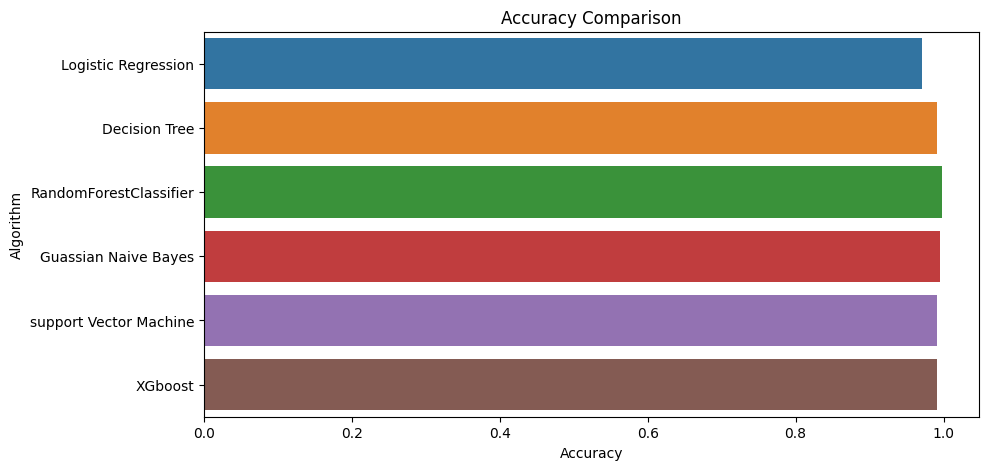

In [264]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = modelname)

In [269]:
accuracy_models = dict(zip(modelname, acc))
for k, v in accuracy_models.items():
    print (k, ':', v)

Logistic Regression : 0.9704545454545455
Decision Tree : 0.990909090909091
RandomForestClassifier : 0.9977272727272727
Guassian Naive Bayes : 0.9954545454545455
support Vector Machine : 0.990909090909091
XGboost : 0.990909090909091


Making prediction

In [349]:
data = np.array([[99,	15,	27,	27.417112,	56.636362,	6.086922,	127.924610]])
prediction = rf.predict(data)
print(prediction)

['apple']


In [304]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [350]:
cropnew

,N,P,K,temperature,humidity,ph,rainfall,label
0,13.271435,9.250219,3.520835,16.154343,6354.383065,3.800960,13.154367,rice
1,12.907665,10.914676,3.480600,16.774608,6079.869536,4.024764,13.414935,rice
2,10.871297,10.624509,3.540246,17.629284,6406.982319,4.348702,13.414935,rice
3,12.061288,8.408602,3.459730,20.017453,6053.905497,4.000944,13.414935,rice
4,12.376969,9.250219,3.500961,15.630089,6288.903619,4.264450,13.414935,rice
...,...,...,...,...,...,...,...,...
2195,14.427541,8.280886,3.270858,20.210052,4057.978610,3.917663,12.513687,coffee
2196,13.897857,5.278345,3.126840,20.645620,2894.733693,3.622217,11.028821,coffee
2197,15.119667,8.151049,3.216164,18.405616,4164.064923,3.741135,12.393870,coffee
2198,15.058334,8.018990,3.322213,19.868754,2428.492995,3.908767,11.003649,coffee
